## Project Description
**Weather forecasting** is the application of science and technology to predict the **conditions of the atmosphere** for a given **location** and **time**. **Weather forecasts** are made by collecting **quantitative** data about the **current state of the atmosphere** at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
### A. Problem Statement: 
1. Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
2. Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there

### Dataset Description:
Number of columns: 23

- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [6]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')

### Load the dataset

In [7]:
# Retrive the dataset using the raw addre
df=pd.read_csv('Rainfall.csv')

In [8]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [9]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [10]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (8425, 23)

The column headers in the dataset: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


This dataset contains 8425 rows and 23 columns. Out of which the variables "Rainfall" and "RainTomorrow" are considered as targets for different approaches, the remaining 21 are independent variables described in the above section Project Description.

Since the dataset can be seen from two angles to find the "Rainfall"(Regression  problem) and the "RainTomorrow" (Classification Problem) we are going to analyze them as target variables during the EDA.

In [11]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

There are two types of data (object and float64 ) present in the dataset, as follows:

* Objects (strings): Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow
* float64: MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm

The dataset presents null values.

## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [12]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
Date                     0          0.00
Location                 0          0.00
MinTemp                 75          0.89
MaxTemp                 60          0.71
Rainfall               240          2.85
Evaporation           3512         41.69
Sunshine              3994         47.41
WindGustDir            991         11.76
WindGustSpeed          991         11.76
WindDir9am             829          9.84
WindDir3pm             308          3.66
WindSpeed9am            76          0.90
WindSpeed3pm           107          1.27
Humidity9am             59          0.70
Humidity3pm            102          1.21
Pressure9am           1309         15.54
Pressure3pm           1312         15.57
Cloud9am              2421         28.74
Cloud3pm              2455         29.14
Temp9am                 56          0.66
Temp3pm                 96          1.14
RainToday              240          2.85
RainTomorrow           239          2.84

In [13]:
# List of the columns with NO missing values
missing_val[missing_val['Null values'] == 0]

Null values  % of missing
Date                0           0.0
Location            0           0.0

The columns Date and Location don't have missing values.

In [14]:
# Storing only the columns with missing values
missing_val = missing_val[missing_val['Null values'] > 0].sort_values(by='% of missing', ascending=False)
missing_val

Null values  % of missing
Sunshine              3994         47.41
Evaporation           3512         41.69
Cloud3pm              2455         29.14
Cloud9am              2421         28.74
Pressure3pm           1312         15.57
Pressure9am           1309         15.54
WindGustDir            991         11.76
WindGustSpeed          991         11.76
WindDir9am             829          9.84
WindDir3pm             308          3.66
Rainfall               240          2.85
RainToday              240          2.85
RainTomorrow           239          2.84
WindSpeed3pm           107          1.27
Humidity3pm            102          1.21
Temp3pm                 96          1.14
WindSpeed9am            76          0.90
MinTemp                 75          0.89
MaxTemp                 60          0.71
Humidity9am             59          0.70
Temp9am                 56          0.66

Now the dataframe missing_val only has columns with missing values.

### 1.2.2 Heatmap with missing values

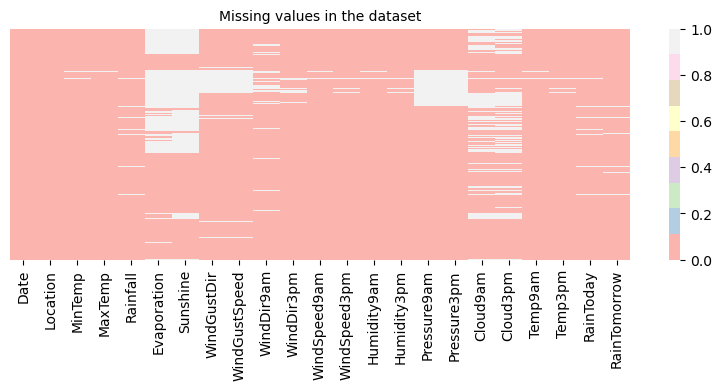

In [15]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Pastel1')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present null values but in a minimal proportion, less than 5%, and others like Sunshine 47.41%, Evaporation 41.69%, Cloud3pm 29.14%, and Cloud9am 28.74%, among others. 
The missing values will be treated in further sections, but first, we will do EDA.

### 1.2.3 Searching for rows with no info

In [16]:
# Create a mask for rows where all specified columns have missing values
missing_values_col = missing_val.index.to_list()
mask = df[missing_values_col].isnull().all(axis=1)

# Use the mask to filter the DataFrame and get rows with all missing values
rows_with_all_missing = df[mask]

# Display the resulting rows
print(f"Columns with missing values: \n{missing_values_col} \n\nNumber of rows with null values in almost all columns: {rows_with_all_missing.shape[0]}")
print(f"This represent {round(rows_with_all_missing.shape[0] / df.shape[0] *100, 2)}% of the data.\n")
print("Rows with null values:")
rows_with_all_missing 

Columns with missing values: 
['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure3pm', 'Pressure9am', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Rainfall', 'RainToday', 'RainTomorrow', 'WindSpeed3pm', 'Humidity3pm', 'Temp3pm', 'WindSpeed9am', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Temp9am'] 

Number of rows with null values in almost all columns: 9
This represent 0.11% of the data.

Rows with null values:


Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
1813  2014-03-31  Newcastle      NaN      NaN       NaN          NaN   
1814  2014-04-01  Newcastle      NaN      NaN       NaN          NaN   
1815  2014-04-02  Newcastle      NaN      NaN       NaN          NaN   
1816  2014-04-03  Newcastle      NaN      NaN       NaN          NaN   
1817  2014-04-04  Newcastle      NaN      NaN       NaN          NaN   
2164  2015-03-17  Newcastle      NaN      NaN       NaN          NaN   
2165  2015-03-18  Newcastle      NaN      NaN       NaN          NaN   
2166  2015-03-19  Newcastle      NaN      NaN       NaN          NaN   
2199  2015-04-21  Newcastle      NaN      NaN       NaN          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
1813       NaN         NaN            NaN        NaN  ...         NaN   
1814       NaN         NaN            NaN        NaN  ...         NaN   
1815       NaN         NaN            NaN        NaN  ...         NaN   
1816       NaN         NaN            NaN        NaN  ...         NaN   
1817       NaN         NaN            NaN        NaN  ...         NaN   
2164       NaN         NaN            NaN        NaN  ...         NaN   
2165       NaN         NaN            NaN        NaN  ...         NaN   
2166       NaN         NaN            NaN        NaN  ...         NaN   
2199       NaN         NaN            NaN        NaN  ...         NaN   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
1813          NaN          NaN          NaN       NaN       NaN      NaN   
1814          NaN          NaN          NaN       NaN       NaN      NaN   
1815          NaN          NaN          NaN       NaN       NaN      NaN   
1816          NaN          NaN          NaN       NaN       NaN      NaN   
1817          NaN          NaN          NaN       NaN       NaN      NaN   
2164          NaN          NaN          NaN       NaN       NaN      NaN   
2165          NaN          NaN          NaN       NaN       NaN      NaN   
2166          NaN          NaN          NaN       NaN       NaN      NaN   
2199          NaN          NaN          NaN       NaN       NaN      NaN   

      Temp3pm  RainToday  RainTomorrow  
1813      NaN        NaN           NaN  
1814      NaN        NaN           NaN  
1815      NaN        NaN           NaN  
1816      NaN        NaN           NaN  
1817      NaN        NaN           NaN  
2164      NaN        NaN           NaN  
2165      NaN        NaN           NaN  
2166      NaN        NaN           NaN  
2199      NaN        NaN           NaN  

[9 rows x 23 columns]

These 9 rows do not add relevant value to the data since the majority of columns present missing values except the Date and Location columns. Not even the target variables have a value, therefore we will drop the 9 rows which represent 0.11% of the data.

In [17]:
# Dropping the rows with missing values in almost all columns
df = df[~mask]
print(f"The new dimension of the dataset is {df.shape}")

The new dimension of the dataset is (8416, 23)


## 1.3 Features Analysis
### 1.3.1 Unique values

In [18]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
Date                           3004   object
Location                         12   object
MinTemp                         285  float64
MaxTemp                         331  float64
Rainfall                        250  float64
Evaporation                     116  float64
Sunshine                        140  float64
WindGustDir                      16   object
WindGustSpeed                    52  float64
WindDir9am                       16   object
WindDir3pm                       16   object
WindSpeed9am                     34  float64
WindSpeed3pm                     35  float64
Humidity9am                      90  float64
Humidity3pm                      94  float64
Pressure9am                     384  float64
Pressure3pm                     374  float64
Cloud9am                          9  float64
Cloud3pm                          9  float64
Temp9am                         304  float64
Temp3pm                         328  float64
RainToday                         2   object
RainTomorrow                      2   object

About the number of unique values:


- Rainfall is the target variable with 250 unique values of 8425 total in the dataset. We are facing a regression problem since the target variable is continuous and numerical.

- RainTomorrow is the other target variable which has 2 unique values (Yes/No) of 8425 total in the dataset, therefore we can confirm we are facing a classification problem.

- The Date datatype is Object, but it will be converted in datetime later.

- For the numbers of unique values we can conclude that the variables Location(12), WindGustDir(16), WindDir9am(16), WindDir3pm(16), RainToday(2), RainTomorrow(2) which are object datatype are categorical.

- However, other columns like Cloud9am(9) and Cloud3pm(9), despite being numerical, seem to be categorical and should be analyzed as categorical as well during EDA.

#### 1.3.1.1 Rainfall unique values

In [19]:
# Inspect the unique values of the target variable
column = 'Rainfall'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Rainfall:
Rainfall
0.0      5299
0.2       406
NaN       231
0.4       177
0.6       116
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: count, Length: 251, dtype: int64
Unique values: [0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.2, 1.4, 1.5, 1.6, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8, 2.9, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.5, 5.6, 6.2, 6.3, 7.4, 7.6, 8.7, 8.8, 9.0, 9.2, 9.4, 9.6, 10.0, 10.8, 11.2, 11.4, 11.8, 12.0, 12.2, 12.8, 13.0, 13.2, 13.6, 13.8, 14.0, 14.2, 14.6, 14.8, 15.0, 15.2, 15.4, 15.6, nan, 3.0, 5.8, 6.0, 6.4, 6.6, 6.8, 7.0, 7.2, 7.8, 8.0, 8.2, 8.4, 8.6, 9.8, 10.2, 10.4, 10.6, 11.0, 11.6, 12.4, 12.6, 13.4, 14.4, 15.7, 15.8, 16.0, 16.2, 16.4, 16.6, 16.8, 17.0, 17.2, 17.4, 17.6, 17.8, 18.0, 18.1, 18.2, 18.4, 18.6, 18.8, 19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22.2, 22.4, 22.5, 22.6, 22.8, 23.0, 23.2, 23.4, 23.6, 23.8, 24.0, 24.4,

The target variable Rainfall has 250 unique values of the 8425 rows in the dataset. In order to predict this feature we need to build a regression model.

In [20]:
print(f"% of zeros in {column} column is {df[column].value_counts(normalize=True)[0]*100:.2f}%")

% of zeros in Rainfall column is 64.74%


#### 1.3.1.2 RainTomorrow unique values

In [21]:
# Inspect the unique values of the target variable
column = 'RainTomorrow'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {df[column].unique()}")
print(f"# unique values: {df[column].nunique()}")

Feature RainTomorrow:
RainTomorrow
No     6195
Yes    1991
Name: count, dtype: int64
Unique values: ['No' 'Yes' nan]
# unique values: 2


The target variable RainTomorrow has 2 unique values of the 8425 rows in the dataset. In order to predict this feature we will build a classification model since the variable is categorical.

#### 1.3.1.3 Date unique values

In [22]:
# Inspect the unique values of the Date variable
column = 'Date'
print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
Date
2011-01-27    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-27    1
2013-01-28    1
2013-01-29    1
2013-01-30    1
2014-04-04    1
Name: count, Length: 3004, dtype: int64


Date column has 310 unique values. Next, we will convert this column to datetime type.

In [23]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

Now the column Date is in datetype format, and we can use it in our analysis.

#### 1.3.1.4 Independent variables unique values

We will separate the numerical discrete variables from the continuous.

In [25]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []
datetime_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    elif df.dtypes[i] == 'datetime64[ns]': 
        print(df.dtypes[i])
        datetime_col.append(i)
    else:
        numerical_col.append(i)

# Put the target variable at the end
numerical_col.remove('Rainfall')
numerical_col = numerical_col + ['Rainfall']

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")
print(f"Datetime Columns:\n {datetime_col}\n")

datetime64[ns]
Categorical Columns:
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical Columns:
 ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Rainfall']

Datetime Columns:
 ['Date']



#### Categorical columns

In [26]:
for i, column in enumerate(categorical_col[:-1]):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature Location:
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        813
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64
# unique values: 12

2.Feature WindGustDir:
WindGustDir
NaN    982
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: count, dtype: int64
# unique values: 16

3.Feature WindDir9am:
WindDir9am
N      906
NaN    820
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: count, dtype: int64
# unique values: 16

4.Feature WindDir3pm:
WindDir3pm
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
ESE 

#### Numerical columns

In [27]:
for i, column in enumerate(numerical_col[:-1]):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature MinTemp:
MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: count, Length: 285, dtype: int64
# unique values: 285

2.Feature MaxTemp:
MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: count, Length: 331, dtype: int64
# unique values: 331

3.Feature Evaporation:
Evaporation
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: count, Length: 116, dtype: int64
# unique values: 116

4.Feature Sunshine:
Sunshine
0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: count, Length: 140, dtype: int64
# unique values: 140

5.Feature WindGustSpeed:
WindGustSpeed
39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0

Although the above columns are numerical, some of them will be analyzed as categorical since they are discrete, as is the case of Cloud9am and Cloud3pm.

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [28]:
# Summary statistics of numerical columns
stats = df.describe()
stats

Date      MinTemp      MaxTemp     Rainfall  \
count                           8416  8350.000000  8365.000000  8185.000000   
mean   2012-08-04 14:42:22.585551360    13.193305    23.859976     2.805913   
min              2008-12-01 00:00:00    -2.000000     8.200000     0.000000   
25%              2010-07-13 00:00:00     9.200000    19.300000     0.000000   
50%              2011-12-23 00:00:00    13.300000    23.300000     0.000000   
75%              2014-09-11 00:00:00    17.400000    28.000000     1.000000   
max              2017-06-25 00:00:00    28.500000    45.500000   371.000000   
std                              NaN     5.403596     6.136408    10.459379   

       Evaporation     Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  4913.000000  4431.000000    7434.000000   8349.000000   8318.000000   
mean      5.389395     7.632205      40.174469     13.847646     18.533662   
min       0.000000     0.000000       7.000000      0.000000      0.000000   
25%       2.600000     4.750000      30.000000      6.000000     11.000000   
50%       4.600000     8.700000      39.000000     13.000000     19.000000   
75%       7.000000    10.700000      50.000000     20.000000     24.000000   
max     145.000000    13.900000     107.000000     63.000000     83.000000   
std       5.044484     3.896235      14.665721     10.174579      9.766986   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  8366.000000  8323.000000  7116.000000  7113.000000  6004.000000   
mean     67.822496    51.249790  1017.640233  1015.236075     4.566622   
min      10.000000     6.000000   989.800000   982.900000     0.000000   
25%      56.000000    39.000000  1013.000000  1010.400000     1.000000   
50%      68.000000    51.000000  1017.700000  1015.300000     5.000000   
75%      80.000000    63.000000  1022.300000  1019.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.000000     8.000000   
std      16.833283    18.423774     6.828699     6.766681     2.877658   

          Cloud3pm      Temp9am      Temp3pm  
count  5970.000000  8369.000000  8329.000000  
mean      4.503183    17.762015    22.442934  
min       0.000000     1.900000     7.300000  
25%       2.000000    13.800000    18.000000  
50%       5.000000    17.800000    21.900000  
75%       7.000000    21.900000    26.400000  
max       8.000000    39.400000    44.100000  
std       2.731659     5.627035     5.980020

In [29]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

Date   Location WindGustDir WindDir9am  \
count                            8416       8416        7434       7596   
unique                            NaN         12          16         16   
top                               NaN  Melbourne           N          N   
freq                              NaN       1622         713        906   
mean    2012-08-04 14:42:22.585551360        NaN         NaN        NaN   
min               2008-12-01 00:00:00        NaN         NaN        NaN   
25%               2010-07-13 00:00:00        NaN         NaN        NaN   
50%               2011-12-23 00:00:00        NaN         NaN        NaN   
75%               2014-09-11 00:00:00        NaN         NaN        NaN   
max               2017-06-25 00:00:00        NaN         NaN        NaN   

       WindDir3pm RainToday RainTomorrow  
count        8117      8185         8186  
unique         16         2            2  
top            SE        No           No  
freq          813      6195         6195  
mean          NaN       NaN          NaN  
min           NaN       NaN          NaN  
25%           NaN       NaN          NaN  
50%           NaN       NaN          NaN  
75%           NaN       NaN          NaN  
max           NaN       NaN          NaN

**Observations**
- The summary of the dataset looks perfect since there are no negative/invalid values present.
- However, The counts of several columns have differences from the total of rows which means there are missing values in the dataset as we mentioned in previous sections.

Next, we will analyze the skewness present in the columns, and infer the present of outliers.

In [30]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Rainfall         347.275329
Evaporation      129.521636
WindSpeed3pm      44.932365
WindGustSpeed     37.494089
WindSpeed9am      28.803195
Humidity3pm       10.902663
Temp9am           10.383915
Temp3pm            9.697025
MaxTemp            9.367208
Pressure9am        7.702368
Pressure3pm        7.230564
MinTemp            4.499502
Humidity9am       -1.489061
Sunshine          -1.524674
Cloud3pm            -1.9665
Cloud9am          -2.321939
Date                    NaN
dtype: object

Since the max value is greater than two standard deviations plus the mean in the features listed above, there could be outliers in the data. 

### 1.3.3 Duplicates

In [31]:
# Searching for duplicated values
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 1663 duplicate rows, which represent 19.760% of the data.


In [32]:
# Remove duplicates across all columns
df = df.drop_duplicates()
print(f"The dimension of the dataset, after drop duplicates, is {df.shape}")

The dimension of the dataset, after drop duplicates, is (6753, 23)


In [33]:
# Checking duplicated rows the same date and location.
df[df.duplicated(['Date','Location'])]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]

There are no duplicate records for the same Date and Location.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Rainfall feature

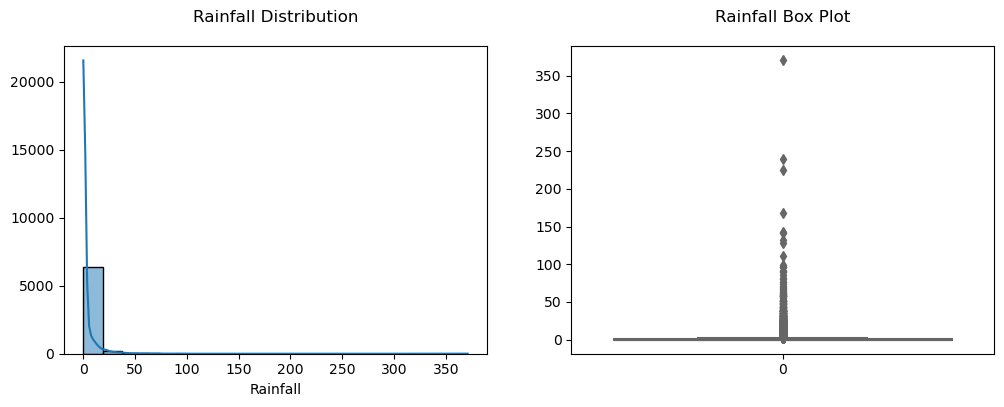

Skewness of Rainfall : 13.510350036642718


In [34]:
#Visualize target distribution
col = 'Rainfall'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Rainfall is skewed to the right and presents a high percentage of zeros. There are outliers present in the Box plot.

#### 1.4.1.2 RainTomorrow feature

In [35]:
# Distribution of RainTomorrow
df['RainTomorrow'].value_counts().to_frame()

count
RainTomorrow       
No             5052
Yes            1572

In [36]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

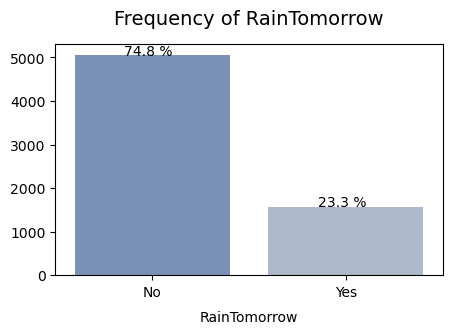

In [37]:
# Set the custom palette
sns.set_palette('vlag')

# Visualize the frequency of RainTomorrow
col = 'RainTomorrow'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

5053 (74.8%) records as "No" and 1572 (23.3%) records as "Yes" of the total dataset. The target variable is imbalanced.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [38]:
# List of categorical columns that look like categories
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}. {col}")

1. Location
2. WindGustDir
3. WindDir9am
4. WindDir3pm
5. RainToday


#### Location (1)

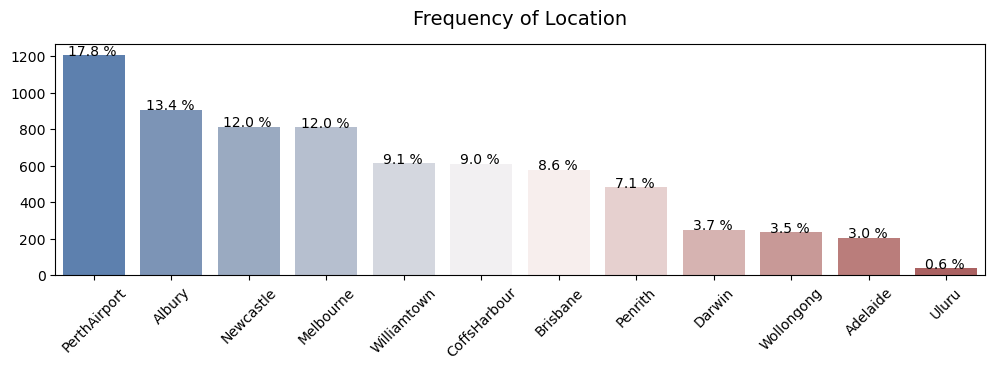

In [39]:
# Visualize the frequency of Location(1)
col = 'Location'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The observations correspond to 12 Locations, most of them were taken in PerthAirport 17.8%, then Albury 13.4%, Newcastle 12%, Melbourne 12%, and so on. For Uluru, there are a few observations that represent 0.6%

#### WindGustDir (2)

For a better understanding of the EDA, we will use a dictionary with the equivalences of wind direction categories.

In [40]:
wind_dir_cat = {'N': 'North',
                'NNE': 'North-Northeast',
                'NE': 'Northeast',
                'ENE': 'East-Northeast',
                'E': 'East',
                'ESE': 'East-Southeast',
                'SE': 'Southeast',
                'SSE': 'South-Southeast',
                'S': 'South',
                'SSW': 'South-Southwest',
                'SW': 'Southwest',
                'WSW': 'West-Southwest',
                'W': 'West',
                'WNW': 'West-Northwest',
                'NW': 'Northwest',
                'NNW': 'North-Northwest' }

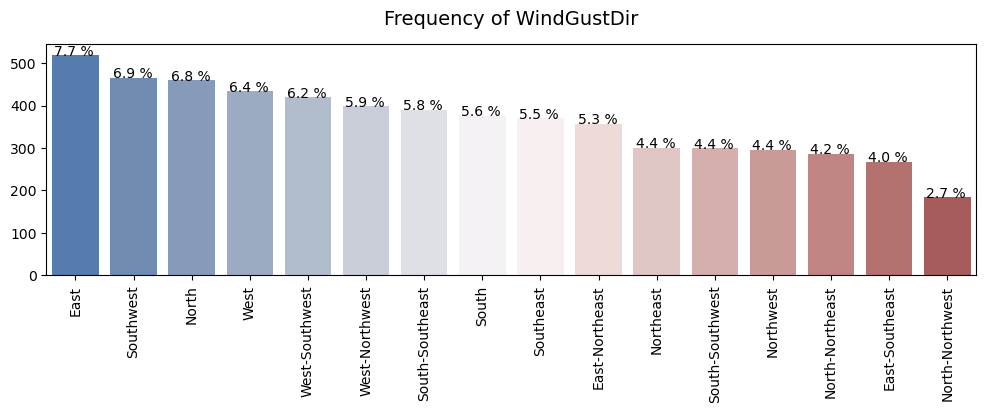

In [41]:
# Visualize the frequency of WindGustDir(2)
col = 'WindGustDir'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
df_counts.index = df_counts.index.map(wind_dir_cat)

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The 5 wind gusts most common directions are East 7.7%, Southwest 6.9%, North 6.8%, West 6.4%, and West-Southwest 6.2% in the observations. The least frequent is North-Northwest with 2.7%

#### WindDir9am (3)

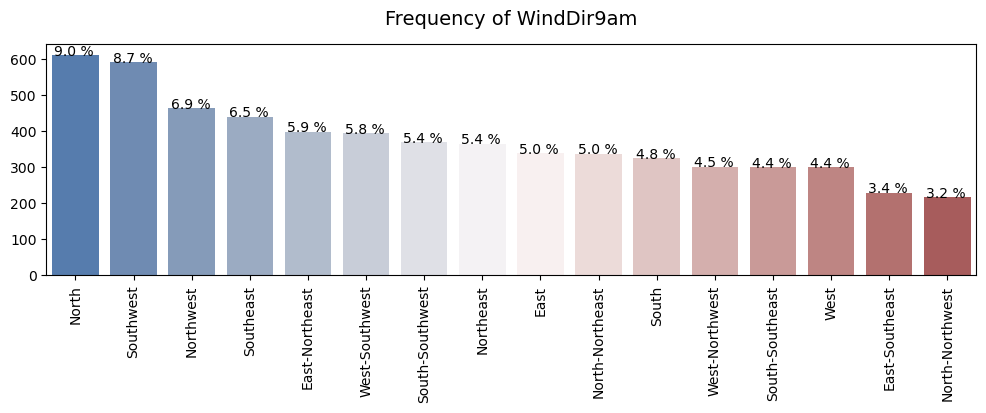

In [42]:
# Visualize the frequency of WindDir9am(3)
col = 'WindDir9am'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
df_counts.index = df_counts.index.map(wind_dir_cat)

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The 5 most common wind directions at 9am are North 9.0%, Southwest 8.7%, Northwest 6.9%, Southeast 6.5%, and East-Northwest 5.9% in the observations. The least frequent is North-Northwest with 3.2%

#### WindDir3pm (4)

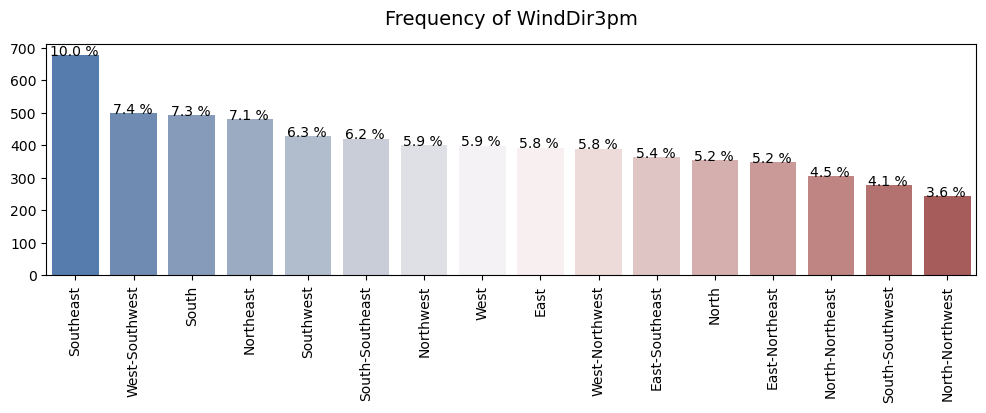

In [43]:
# Visualize the frequency of WindDir3pm(4)
col = 'WindDir3pm'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
df_counts.index = df_counts.index.map(wind_dir_cat)

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The 5 most common wind directions at 3pm are Southeast 10.0%, West-Southwest 7.4%, South 7.3%, Northeast 7.1%, and Southwest 6.3% in the observations. The least frequent is North-Northwest with 3.6%.

#### RainToday (5)

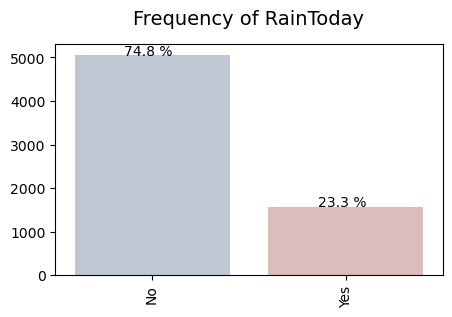

In [44]:
# Visualize the frequency of RainToday(5)
col = 'RainToday'
plt.figure(figsize=(5, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

74.8% correspond to No and only 23.3% to Yes in the RainToday column.

#### Numerical columns

In [45]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col[:-1]):
    print(f"{i+1}. {col}")

1. MinTemp
2. MaxTemp
3. Evaporation
4. Sunshine
5. WindGustSpeed
6. WindSpeed9am
7. WindSpeed3pm
8. Humidity9am
9. Humidity3pm
10. Pressure9am
11. Pressure3pm
12. Cloud9am
13. Cloud3pm
14. Temp9am
15. Temp3pm


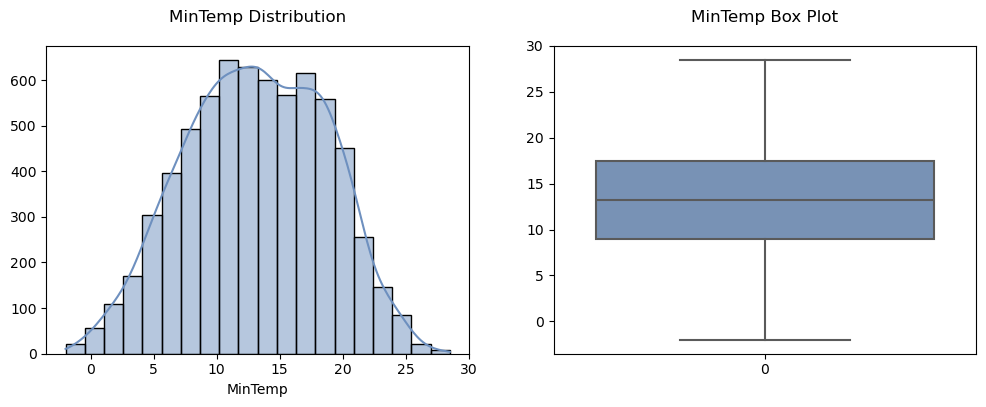

Skewness of MinTemp : -0.08327137996747112


In [46]:
#Visualize (1) MinTemp
col = 'MinTemp'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'MinTemp' is slightly skewed to the left. There are no outliers present in the Box plot.

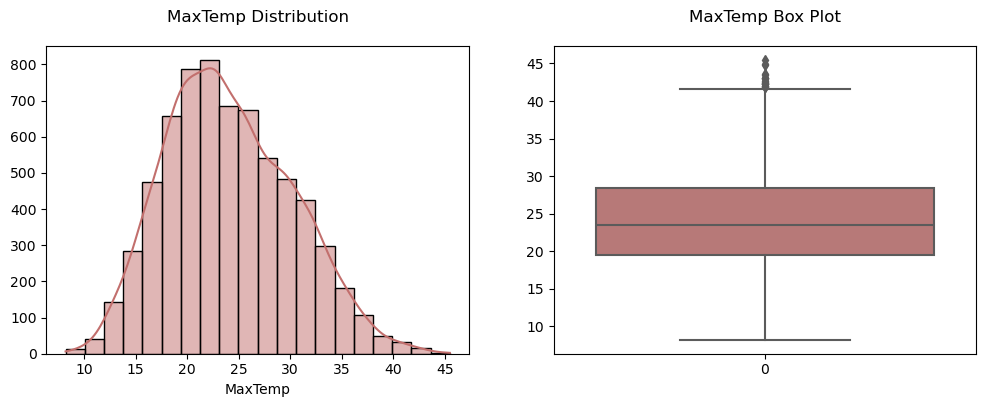

Skewness of MaxTemp : 0.3262146542942423


In [47]:
#Visualize (2) MaxTemp
col = 'MaxTemp'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)
sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MaxTemp
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'MaxTemp' is slightly skewed to the right. There are outliers present in the Box plot.

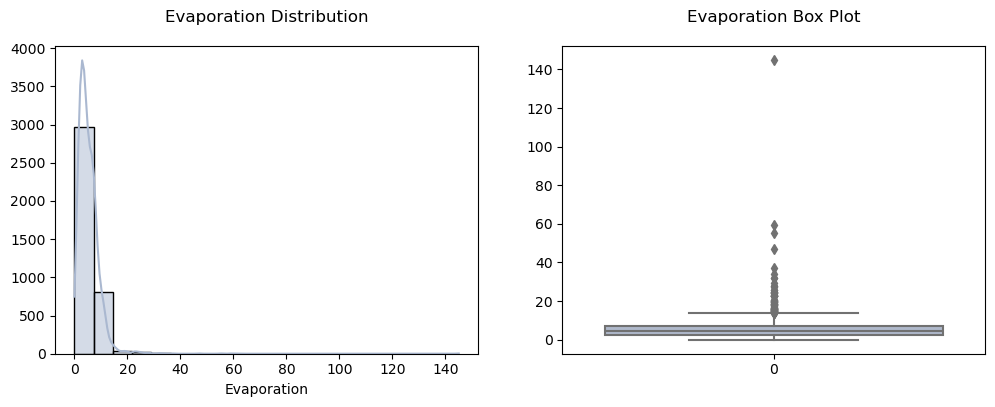

Skewness of Evaporation : 10.216569932129818


In [48]:
#Visualize (3) Evaporation
col = 'Evaporation'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Evaporation
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Evaporation' is skewed to the right. There are outliers present in the Box plot.

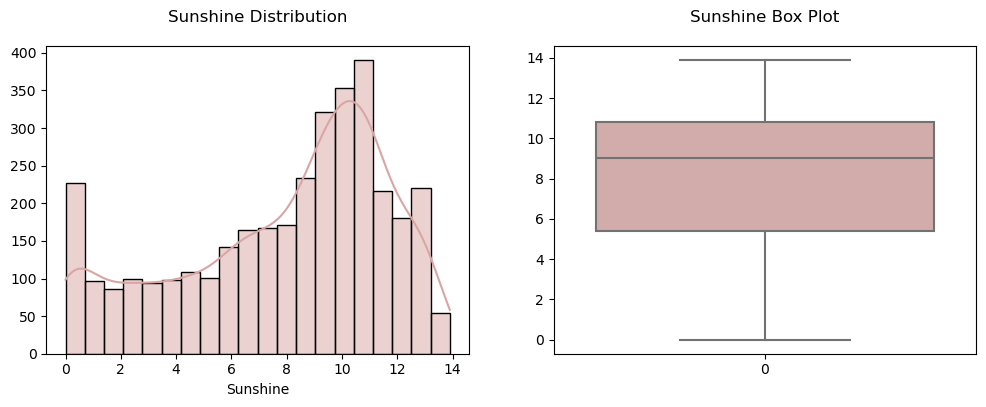

Skewness of Sunshine : -0.6371369042547046


In [49]:
#Visualize (4) Sunshine
col = 'Sunshine'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#d9a6a4')
sns.boxplot(df[col], ax=axes[1], color='#d9a6a4')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Sunshine
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Sunshine' is skewed to the left. There are NO outliers present in the Box plot.

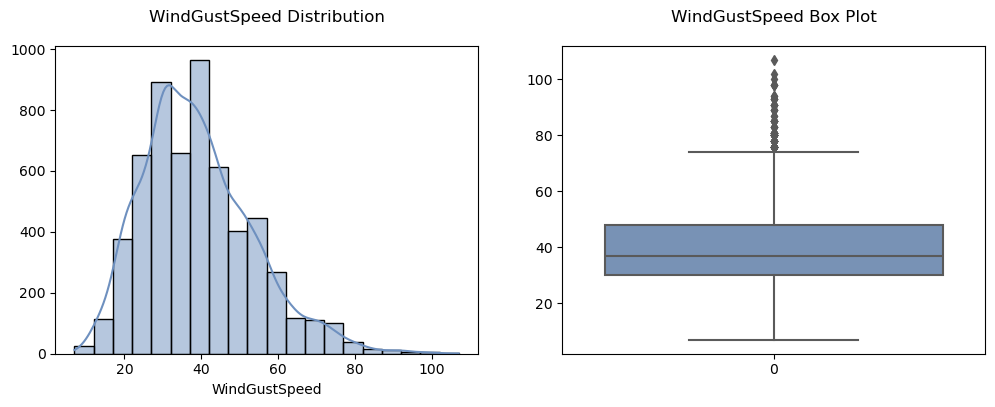

Skewness of WindGustSpeed : 0.7240650794121386


In [50]:
#Visualize (5) WindGustSpeed
col = 'WindGustSpeed'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total WindGustSpeed
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'WindGustSpeed' is skewed to the right. There are outliers present in the Box plot.

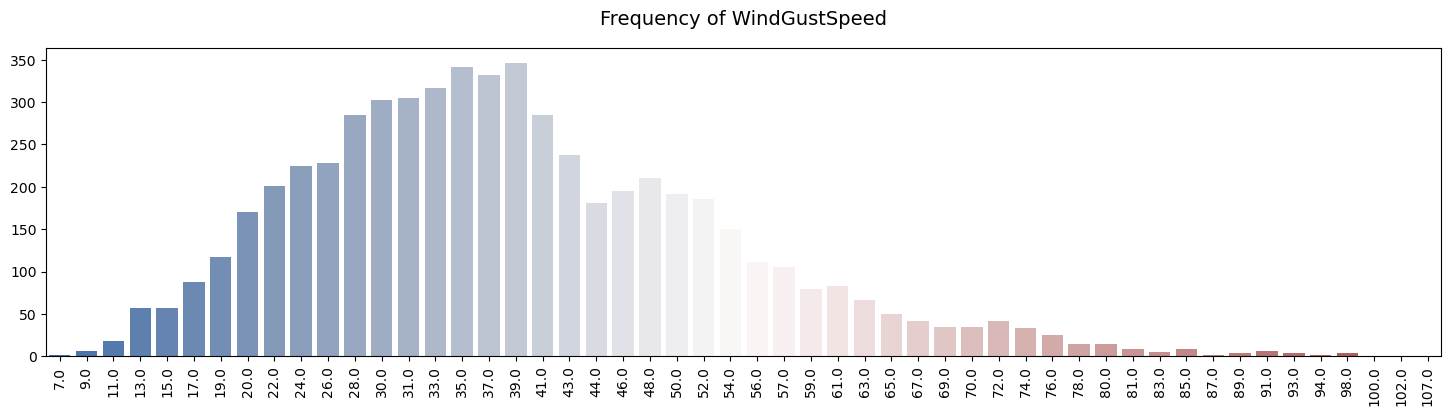

In [51]:
# Visualize the frequency of WindGustSpeed
column = 'WindGustSpeed'
plt.figure(figsize=(18, 4))
ax = sns.countplot(x=column, data=df, palette='vlag')

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

As we can see most of the observations of the strongest wind gusts are between 24.0 and 44.0 (km/h) in the 24 hours to midnight.

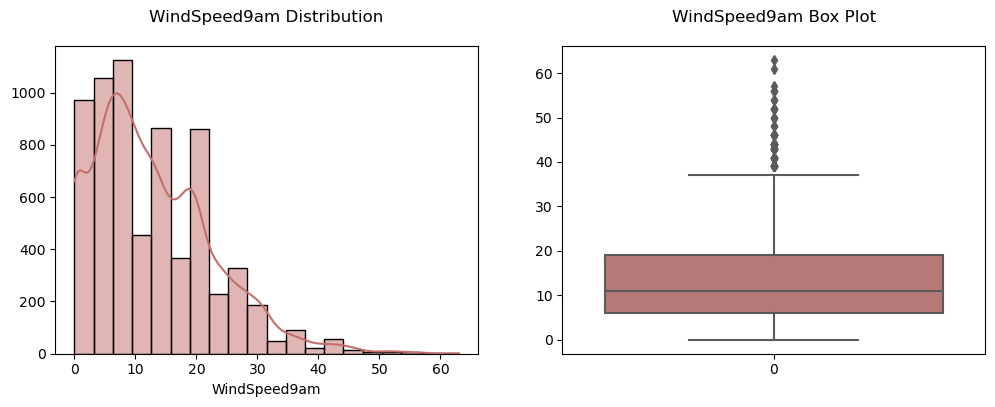

Skewness of WindSpeed9am : 0.9525689961936727


In [52]:
#Visualize (6) WindSpeed9am
col = 'WindSpeed9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of WindSpeed9am
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'WindSpeed9am' is skewed to the right. There are outliers present in the Box plot.

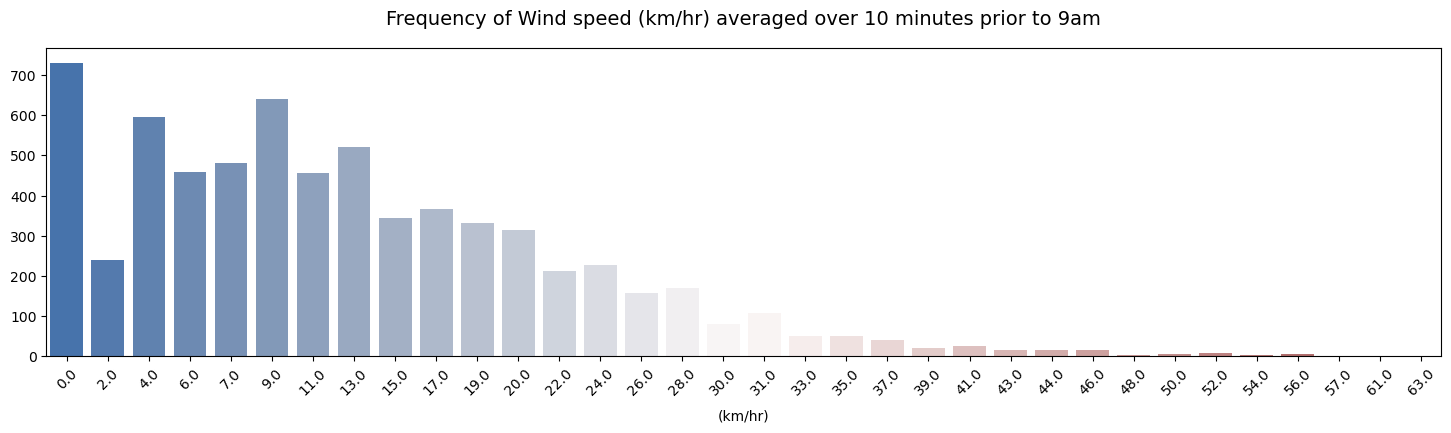

In [53]:
# Visualize the frequency of WindSpeed9am 
column = 'WindSpeed9am'
plt.figure(figsize=(18, 4))
ax = sns.countplot(x=column, data=df, palette='vlag')

plt.xticks(rotation=45)
plt.xlabel('(km/hr)', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Wind speed (km/hr) averaged over 10 minutes prior to 9am", size=14, y=1.05);

Most of the observations are zero km/hr, then 9.0 km/hr wind speed on average over 10 minutes prior to 9am.

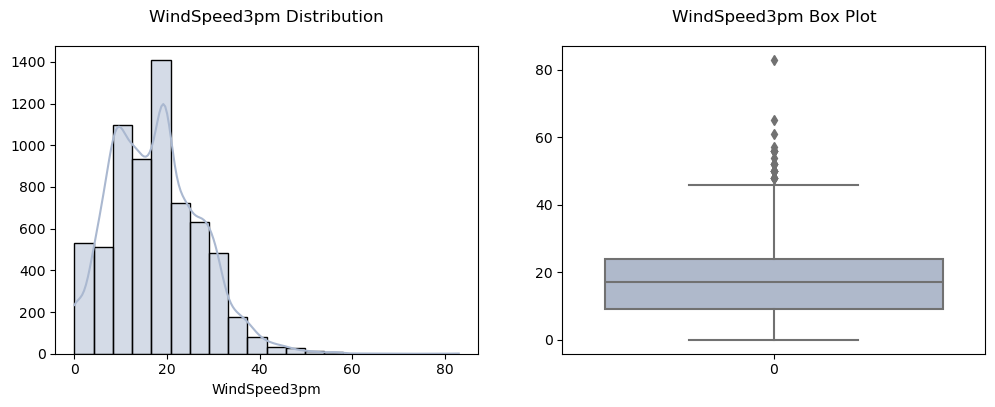

Skewness of WindSpeed3pm : 0.5457184444221408


In [54]:
#Visualize (7) WindSpeed3pm
col = 'WindSpeed3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of WindSpeed3pm
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'WindSpeed3pm' is skewed to the right. There are outliers present in the Box plot.

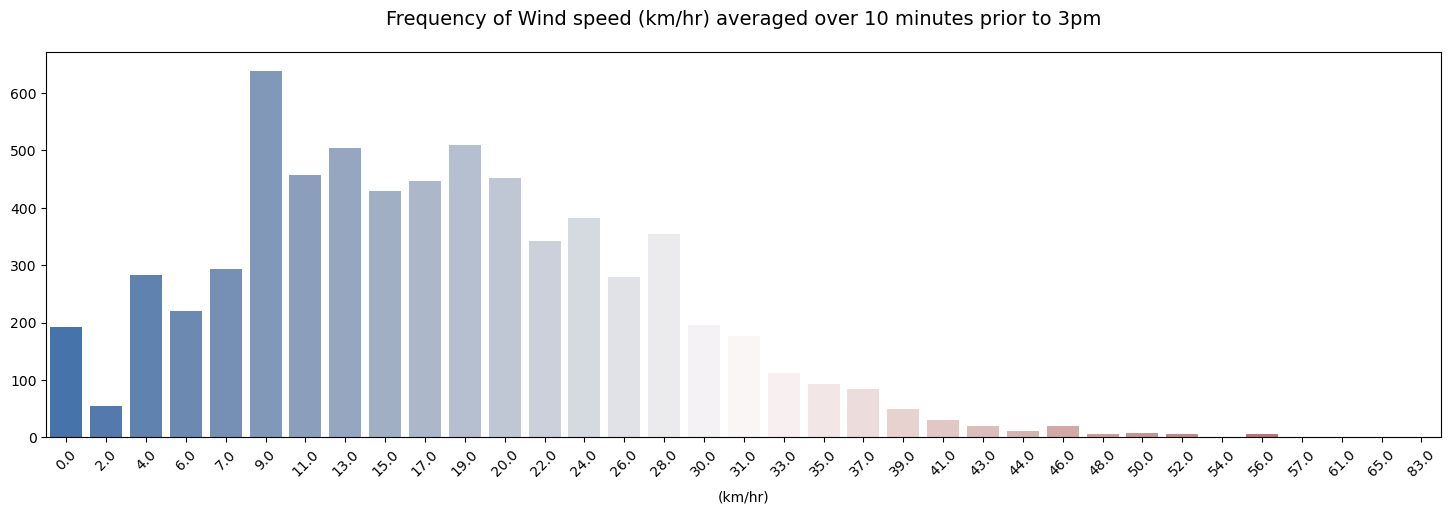

In [55]:
# Visualize the frequency of WindSpeed3pm 
column = 'WindSpeed3pm'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df, palette='vlag')

plt.xticks(rotation=45)
plt.xlabel('(km/hr)', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Wind speed (km/hr) averaged over 10 minutes prior to 3pm", size=14, y=1.05);

Most of the observations correspond to 9.0 km/hr wind speed on average over 10 minutes prior to 3pm.

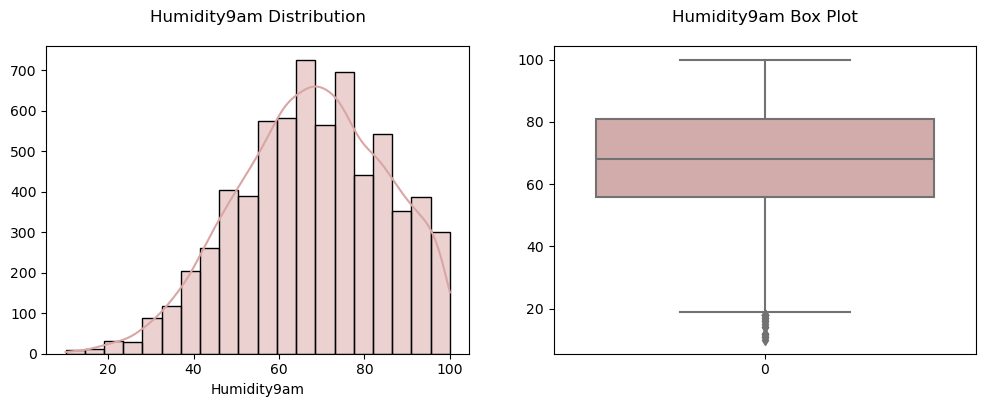

Skewness of Humidity9am : -0.2551524572296424


In [56]:
#Visualize (8) Humidity9am
col = 'Humidity9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#d9a6a4')
sns.boxplot(df[col], ax=axes[1], color='#d9a6a4')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Humidity9am
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Humidity9am' is skewed to the left. There are outliers present in the Box plot.

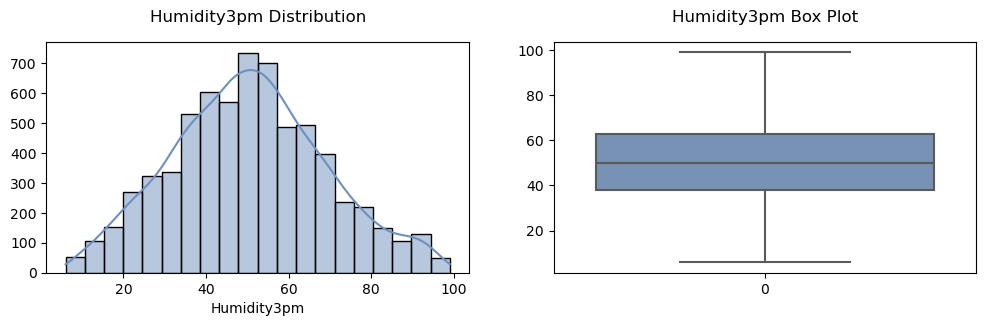

Skewness of Humidity3pm : 0.14978550603236443


In [57]:
#Visualize (9) Humidity3pm
col = 'Humidity3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Humidity3pm
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Humidity3pm' seems almost normal. There are NO outliers present in the Box plot.

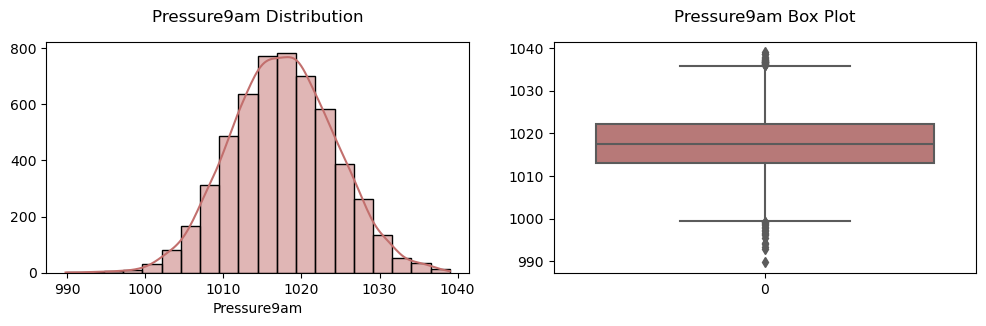

Skewness of Pressure9am : 0.01983565576153915


In [58]:
#Visualize (10) Pressure9am
col = 'Pressure9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Pressure9am
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Pressure9am' seems almost normal, despite there being outliers present in the Box plot.

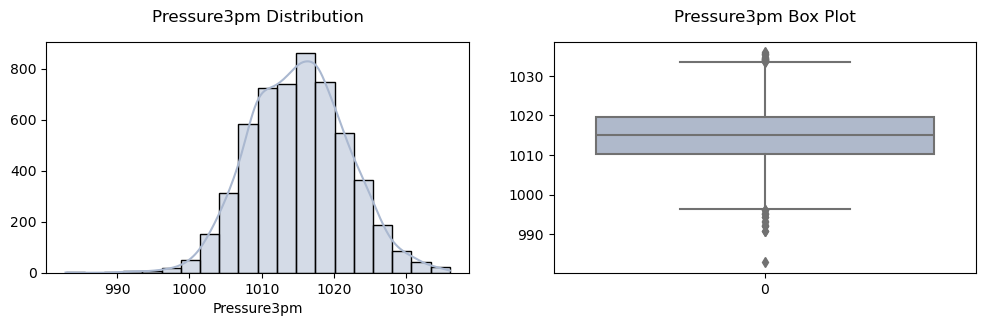

Skewness of Pressure3pm : 0.038600734103795574


In [59]:
#Visualize (11) Pressure3pm
col = 'Pressure3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Pressure3pm
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Pressure3pm ' seems almost normal, despite there being outliers present in the Box plot.

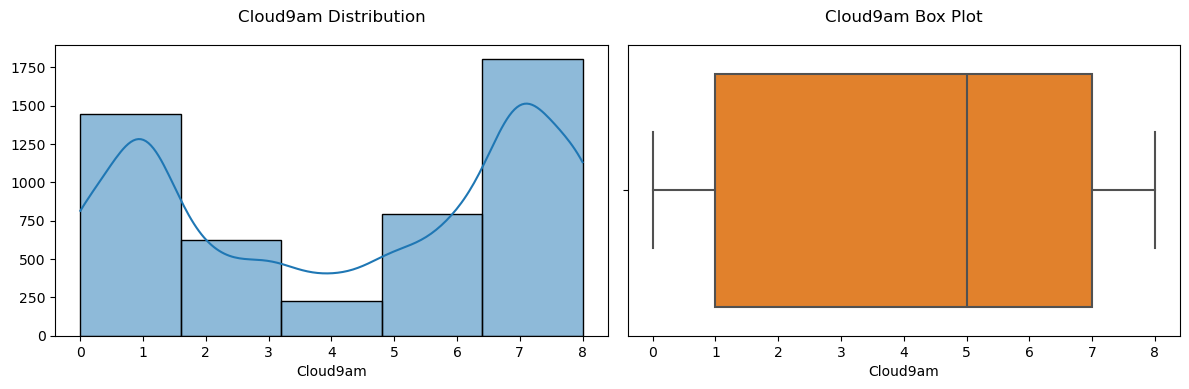

Skewness of Cloud9am : -0.18303318130253776


In [60]:


col = 'Cloud9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Define colors
hist_color = '#1f77b4'  # Blue
box_color = '#ff7f0e'   # Orange

sns.histplot(df[col], kde=True, bins=5, ax=axes[0], color=hist_color)
sns.boxplot(x=df[col], ax=axes[1], color=box_color)

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.tight_layout()
plt.show()

# Show the skewness of Cloud9am
print(f"Skewness of {col} : {df[col].skew()}")


The distribution of 'Cloud9am' has two high points nearly 1 and 7. There are NO outliers present in the Box plot. This feature gives us more information if we analyze it as a categorical variable, as follows.

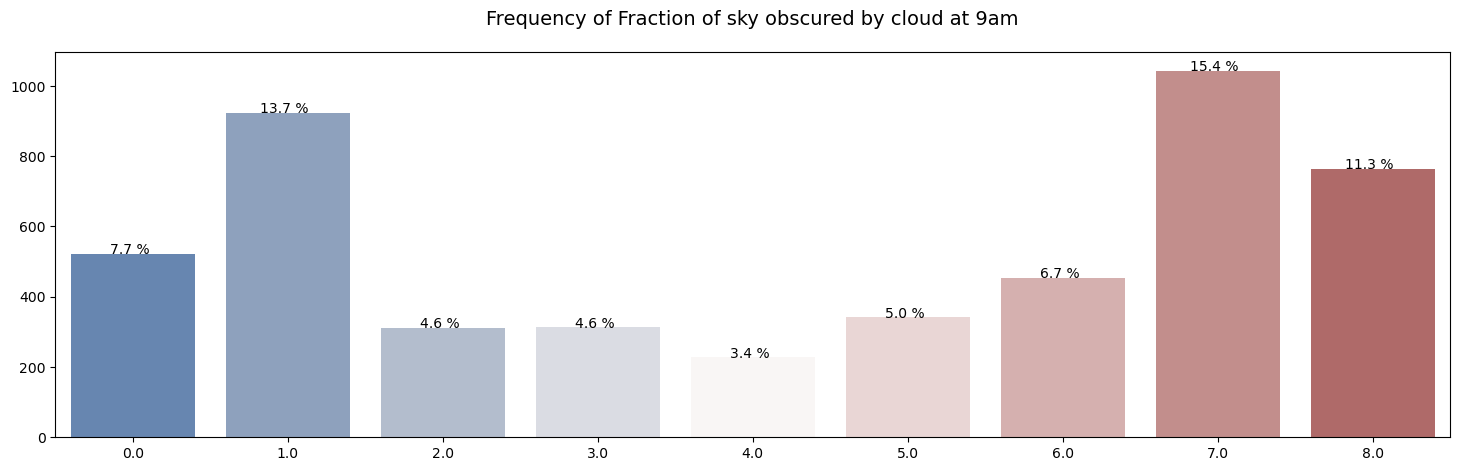

In [61]:
# Visualize the frequency of Cloud9am (3)
column = 'Cloud9am'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Fraction of sky obscured by cloud at 9am", size=14, y=1.05);

Despite the feature is numerical, it can considered categorical since has only 9 unique values. Most of the observations correspond to 7.0 with 15.4%, then 1.0 with 13.7%.

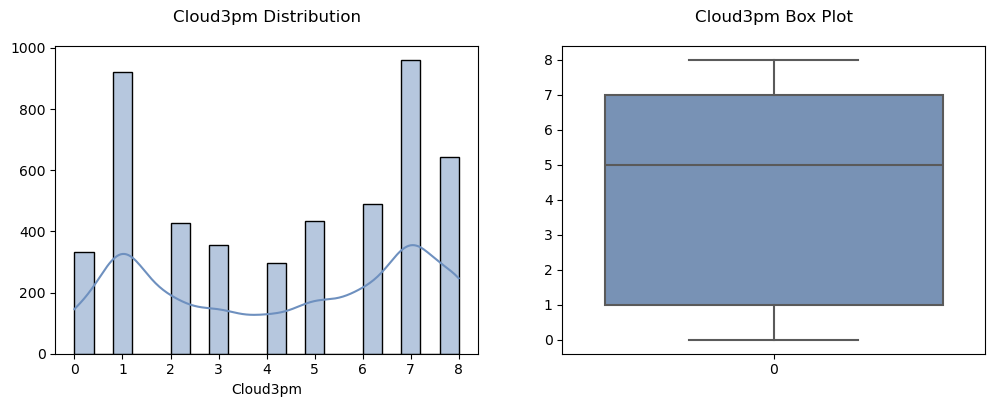

Skewness of Cloud3pm : -0.13748605707196723


In [62]:
#Visualize (13) Cloud3pm
col = 'Cloud3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total Cloud3pm
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Cloud3pm' has two high points nearly 1 and 7. There are NO outliers present in the Box plot. This feature gives us more information if we analyze it as a categorical variable, as follows.

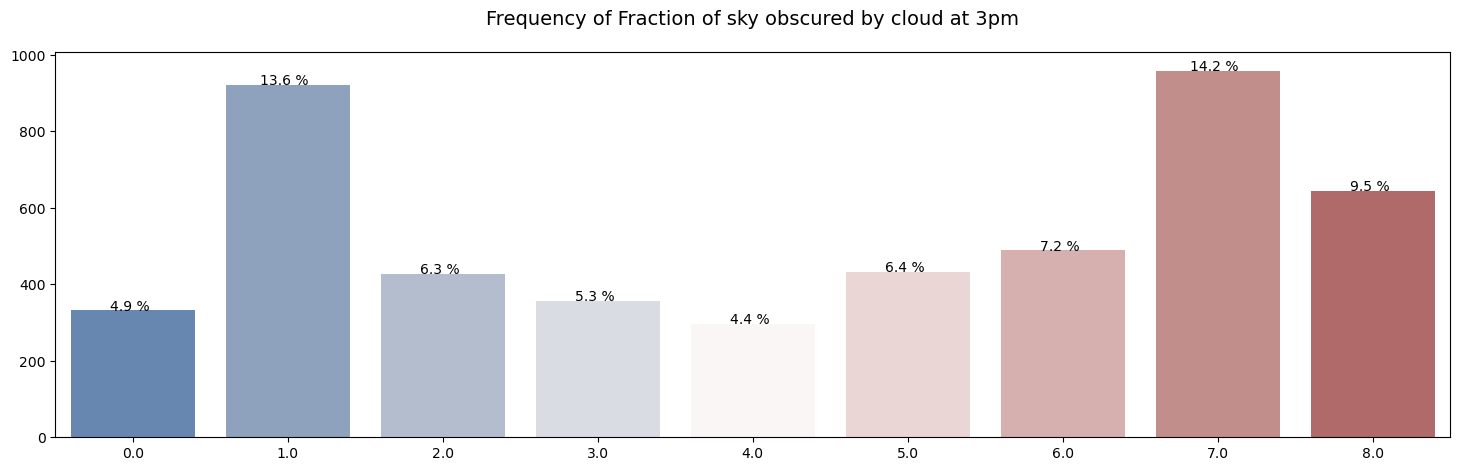

In [63]:
# Visualize the frequency of Cloud3pm
column = 'Cloud3pm'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Fraction of sky obscured by cloud at 3pm", size=14, y=1.05);

Despite the feature is numerical, it can considered categorical since has only 9 unique values. Most of the observations correspond to 7.0 with 14.2%, then 1.0 with 13.6%

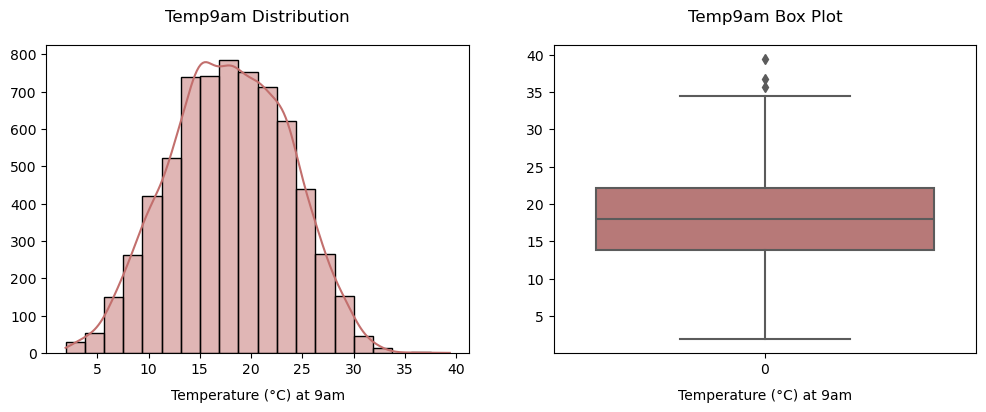

Skewness of Temp9am : -0.04703426366372244


In [64]:
#Visualize (14) Temp9am
col = 'Temp9am'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('Temperature (°C) at 9am', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].set_xlabel('Temperature (°C) at 9am', size=10, labelpad=8)

plt.show()

# Show the skewness of Temp9am
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Temp9am' is slightly skewed to the left. There are some outliers present in the Box plot.

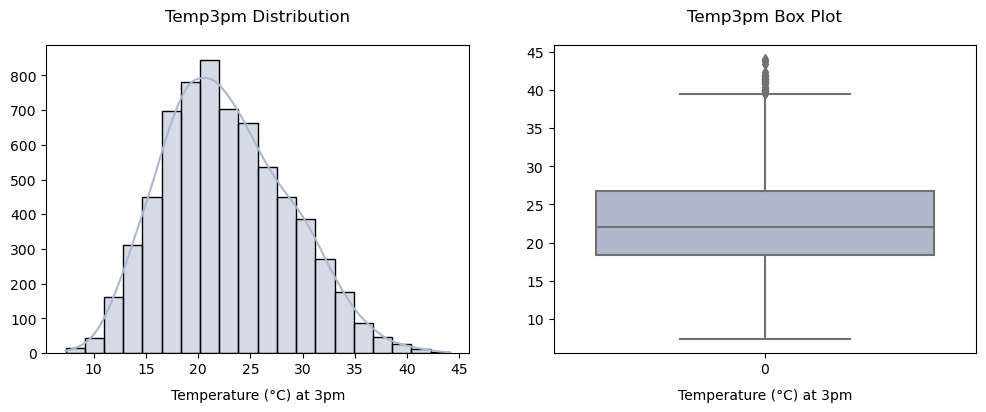

Skewness of Temp3pm : 0.3457252613504707


In [65]:
#Visualize (15) Temp3pm
col = 'Temp3pm'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('Temperature (°C) at 3pm', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].set_xlabel('Temperature (°C) at 3pm', size=10, labelpad=8)

plt.show()

# Show the skewness of Temp3pm
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Temp3pm' is skewed to the right. There are outliers present in the Box plot.

#### 1.4.1.4 Univariate Boxplot

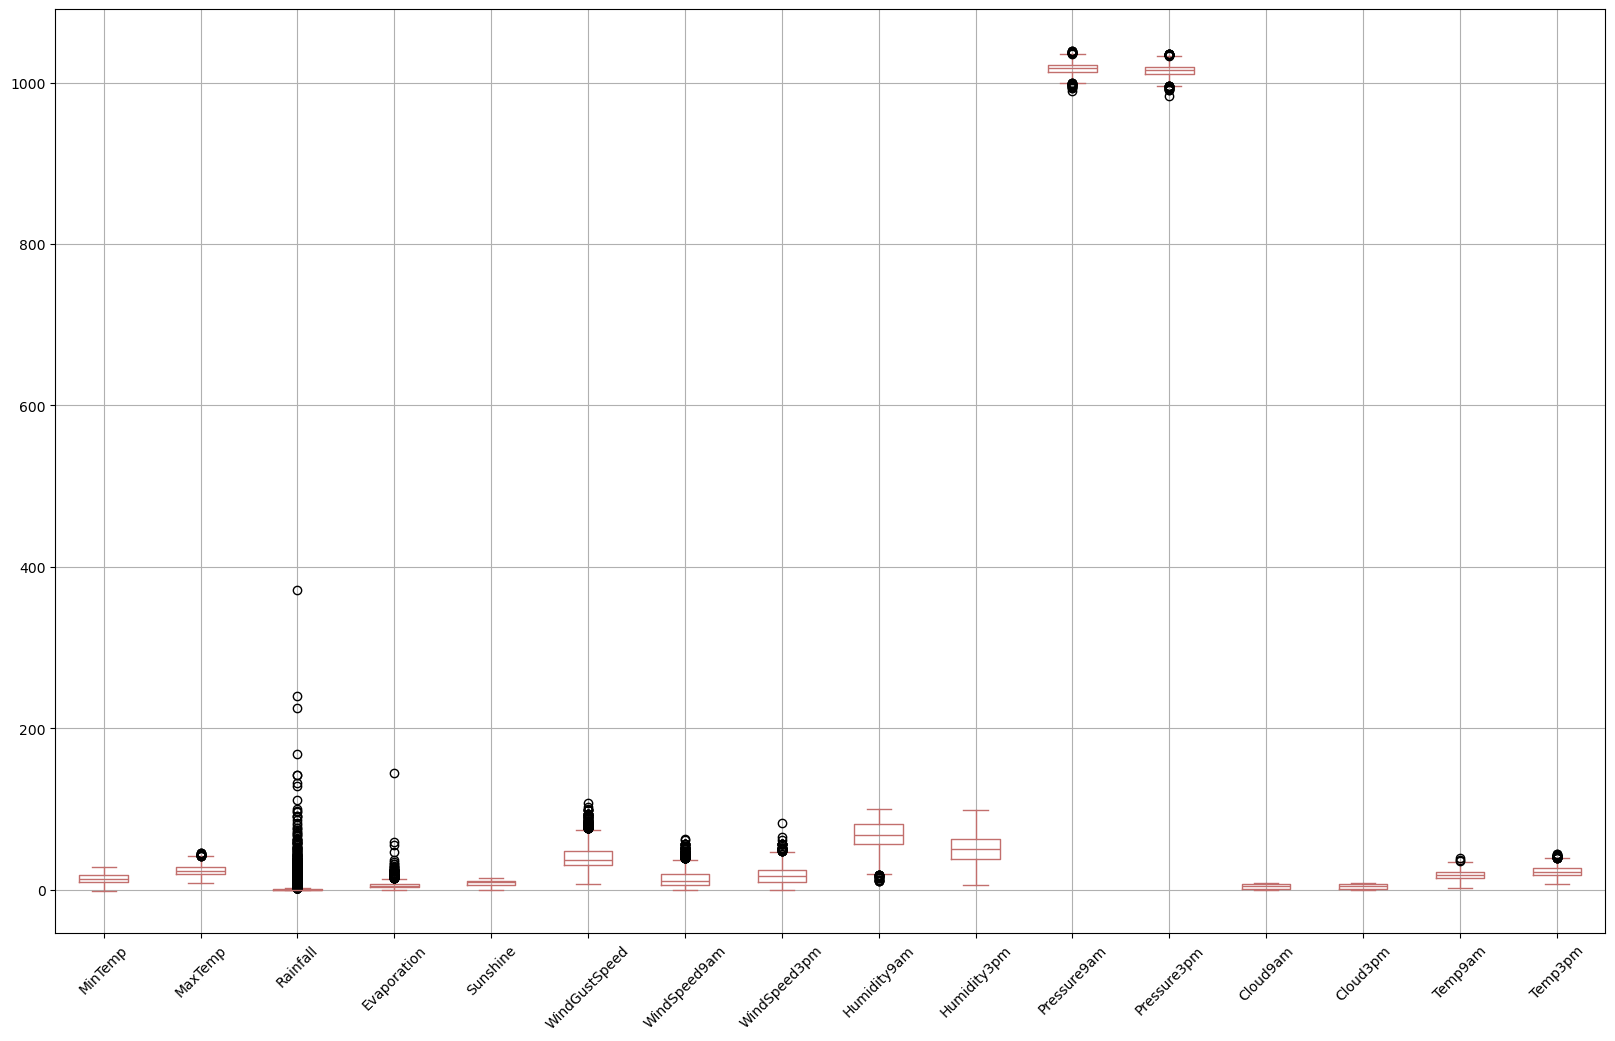

In [66]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

The data is in different scales therefore it will be scaled later in the analysis. Pressure9am and Pressure3pm columns have a different scale noticeably.

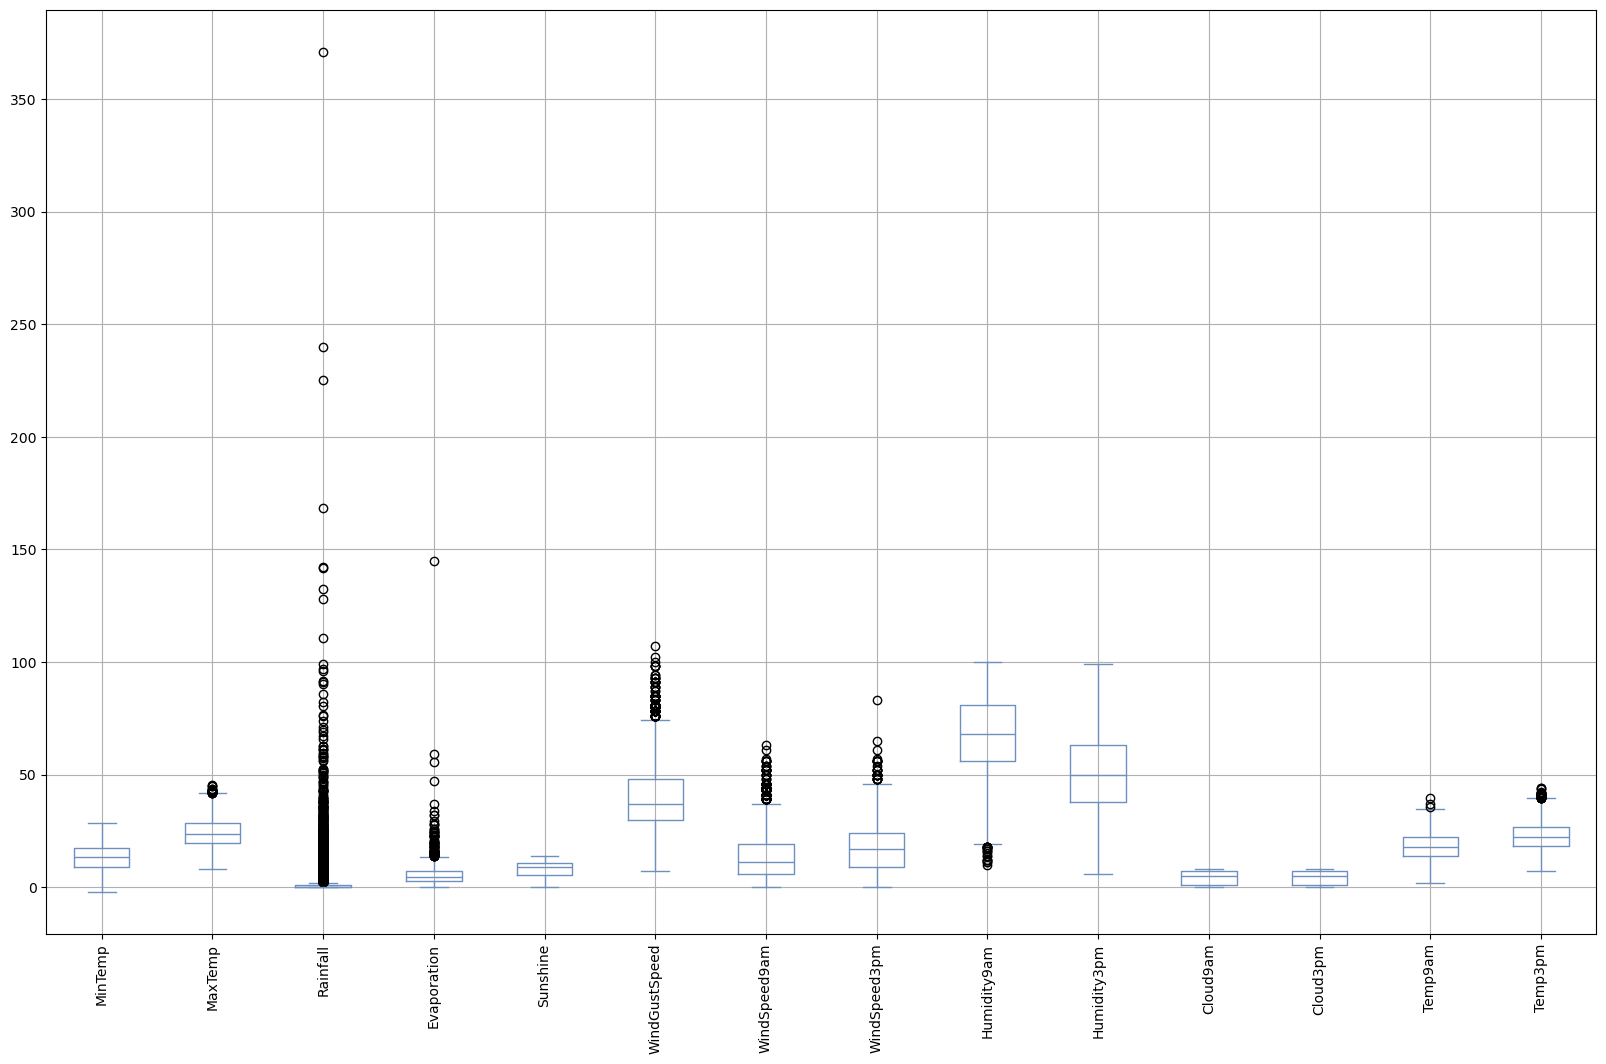

In [67]:
# Draw a boxplot for each independent variable 
df.drop(['Pressure9am', 'Pressure3pm'], axis=1).boxplot(figsize=(20,12), color='#6e90bf')
plt.xticks(rotation=90)
plt.show()

Above we plot all features but Pressure9am and Pressure3pm columns, so we can conclude the other columns are in different scales too. Rainfall presents outliers.

### 1.4.2  Bivariate Analysis

#### 1.4.2.1 Preprocesing Date column
We will create new columns from the Date variable, and then drop it.

In [68]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

#### 1.4.2.2 Comparing the maximum and minimum temperature over time

In [69]:
# Define the function that plot two features <cols> over the time 
def plot_comparing_features_over_time(cols, data, labels, colors, title, xlabel, ylabel, figsize):
    '''Define the function that plot the feature <col> by <category_col> over the time '''

    # Style settings
    sns.set_style('whitegrid')
    sns.set(font_scale=1.5)  
    plt.figure(figsize=figsize)

    # line plot for the maximum temperature 
    plot1 = sns.lineplot(x='Date', y=cols[0], data=data, label=labels[0], color=colors[0])

    # line plot for the minimun temperature 
    plot2 = sns.lineplot(x='Date', y=cols[1], data=data, label=labels[1], color=colors[1])

    # style the plot
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

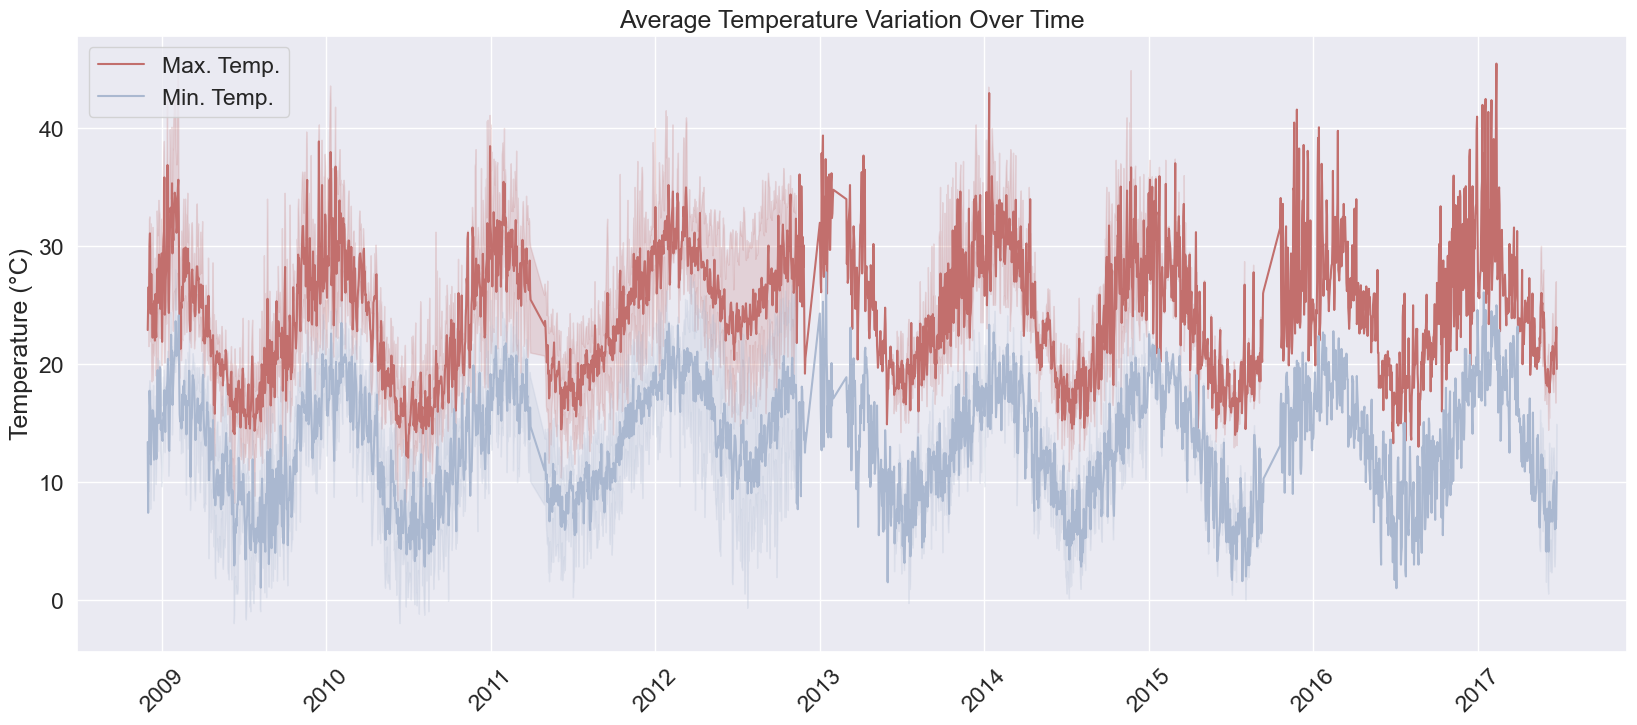

In [70]:
cols = ['MaxTemp', 'MinTemp']
labels = ['Max. Temp.', 'Min. Temp.']
colors = ['#c26f6d', '#aab8d0']
title = 'Average Temperature Variation Over Time'
xlabel, ylabel = '', 'Temperature (°C)'
figsize = (20,8)

plot_comparing_features_over_time(cols, df, labels, colors, title, xlabel, ylabel, figsize)

The above plot shows how the maximum and minimum temperature observations over time. The maximum temperature registered was about 45.5°C in the first quarter of 2017, and the lowest where registered in the second quarter of 2009.

In [71]:
df[df['MaxTemp'] == df.MaxTemp.max()]

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
3302 2017-02-11  Williamtown     25.0     45.5       0.0          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  \
3302       NaN         SSW           43.0        WSW  ...      1002.6   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  \
3302       NaN       NaN     27.3     43.9         No            No  2017   

      month  day  
3302      2   11  

[1 rows x 26 columns]

In [72]:
df[df['MinTemp'] == df.MinTemp.min()]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
192 2009-06-11   Albury     -2.0      9.6       0.0          NaN       NaN   
560 2010-06-14   Albury     -2.0     13.2       0.0          NaN       NaN   

    WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  \
192          SE           13.0        NaN  ...      1023.0       NaN   
560         ESE           17.0        NaN  ...      1032.0       NaN   

     Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
192       1.0      2.2      8.8         No            No  2009      6   11  
560       6.0      2.2     12.6         No            No  2010      6   14  

[2 rows x 26 columns]

#### 1.4.2.3 Evaporation (mm) in the 24 hours to 9am over time according to Location

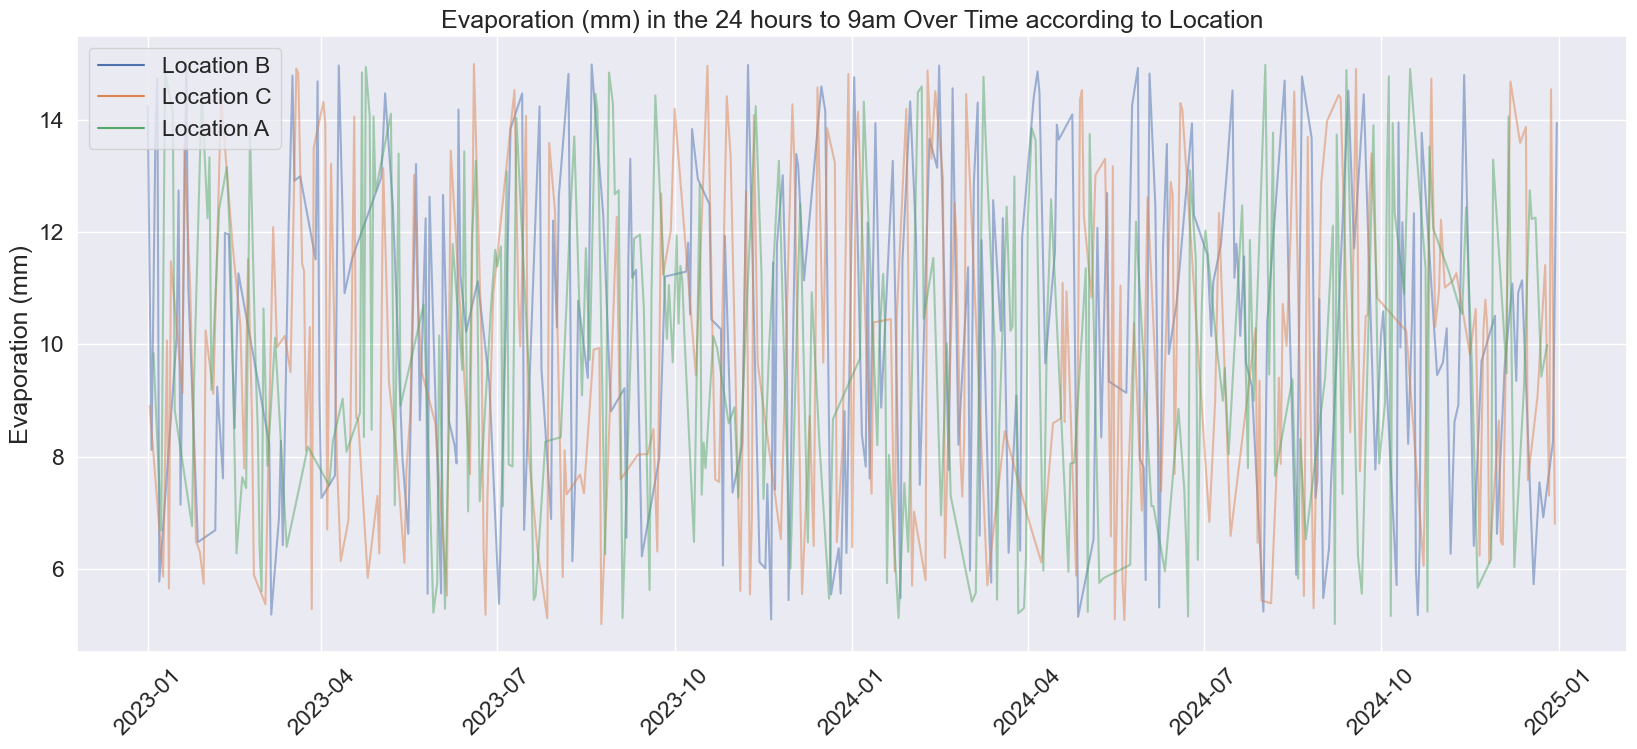

In [73]:

# Fabricated example data
dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
locations = np.random.choice(['Location A', 'Location B', 'Location C'], len(dates))
evaporation = np.random.uniform(low=5.0, high=15.0, size=len(dates))

# Creating DataFrame
average_by_month_year = pd.DataFrame({'Date': dates, 'Location': locations, 'Evaporation': evaporation})

# Style settings
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 8))
col = 'Evaporation'

# Line plot for the evaporation
sns.lineplot(x='Date', y=col, data=average_by_month_year, hue='Location', alpha=0.5)

# Style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title(f'{col} (mm) in the 24 hours to 9am Over Time according to Location')
plt.xlabel('')
plt.ylabel(f'{col} (mm)')

plt.show()


We have observations by location in different time periods, for example, Williamtown has observations between 2015 and 2017 and it is the only place that registers measurements over 20, however, this may be an outlier.

Next, we will plot the evaporation without the Williamtown location to a better view of how this feature behaves.

In [74]:
# Define the function that plot the feature <col> by <category_col> over the time 
def plot_scatter_over_time(col, category_col, data, title, xlabel, ylabel, figsize):
    '''Define the function that plot the feature <col> by <category_col> over the time '''
    # Style settings
    sns.set_style('whitegrid')
    sns.set(font_scale=1.5)  
    plt.figure(figsize=figsize)

    # line plot for the column <col>
    sns.relplot(x='Date', y=col, kind='scatter', data=data, hue=category_col, style=category_col, alpha=0.5, aspect=3, palette='Set1' )

    # style the plot
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

<Figure size 2000x800 with 0 Axes>

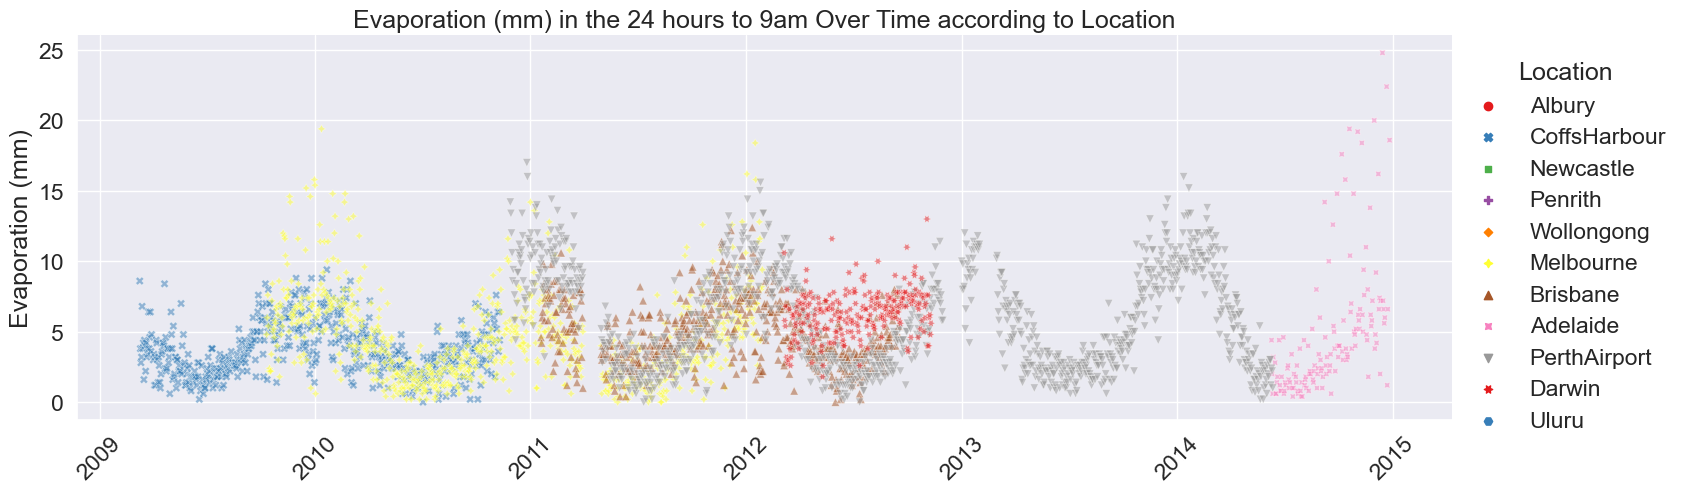

In [75]:
# Config vars
col = 'Evaporation'
category_col = 'Location'
data=df[df['Location']!='Williamtown']
# data = average_by_month_year[average_by_month_year['Location']!='Williamtown']
xlabel, ylabel = '', f'{col} (mm)'
figsize = (20, 8)
title = f'{col} (mm) in the 24 hours to 9am Over Time according to Location'

plot_scatter_over_time(col, category_col, data, title, xlabel, ylabel, figsize)

For the other locations, the evaporation remains between 0 and 25, but we only have observation until 2015.

In [76]:
# Define the function that plot the feature <col> over the time by location

def plot_by_location_over_time(col, category_col, data, category_order, title, figsize, sharey):
    # Style settings
    sns.set_style('whitegrid')
    sns.set(font_scale=1.5)  

    # Filter the locations with non-null values
    df_no_missings = data[~data[col].isna()]

    n_plots = df_no_missings['Location'].nunique()
    fig, axes = plt.subplots(n_plots, 1, figsize=figsize, sharey=sharey)

    for i, loc in enumerate(df_no_missings['Location'].unique()):
        df_loc = df_no_missings[df_no_missings['Location']==loc]

        # line plot for the Sunshine by location 
        plot = sns.lineplot(x='Date', y=col, data=df_loc, ax=axes[i], hue=category_col, hue_order=category_order)

        axes[i].set_ylabel('', size=10, labelpad=8)
        axes[i].set_xlabel('', size=10, labelpad=8)
        axes[i].set_title(f'{title} Over time in {loc}', size=16, y=1)

    plt.show()
    return [df_no_missings, plot]

Next, we will analyze how Evaporation feature behave according to each location and how impacts the possibilities of Rain Tomorrow.

Above we see the plots of Evaporation in each location individually. As expected, the ranges vary according to location. The observations for the locations correspond to different spaces of time.
For the locations: Albury, Newcastle, Penrith, Wollongong, and Uluru there are no values.

#### 1.4.2.4 The number of hours of bright sunshine in the day over time according to Location

<Figure size 2000x800 with 0 Axes>

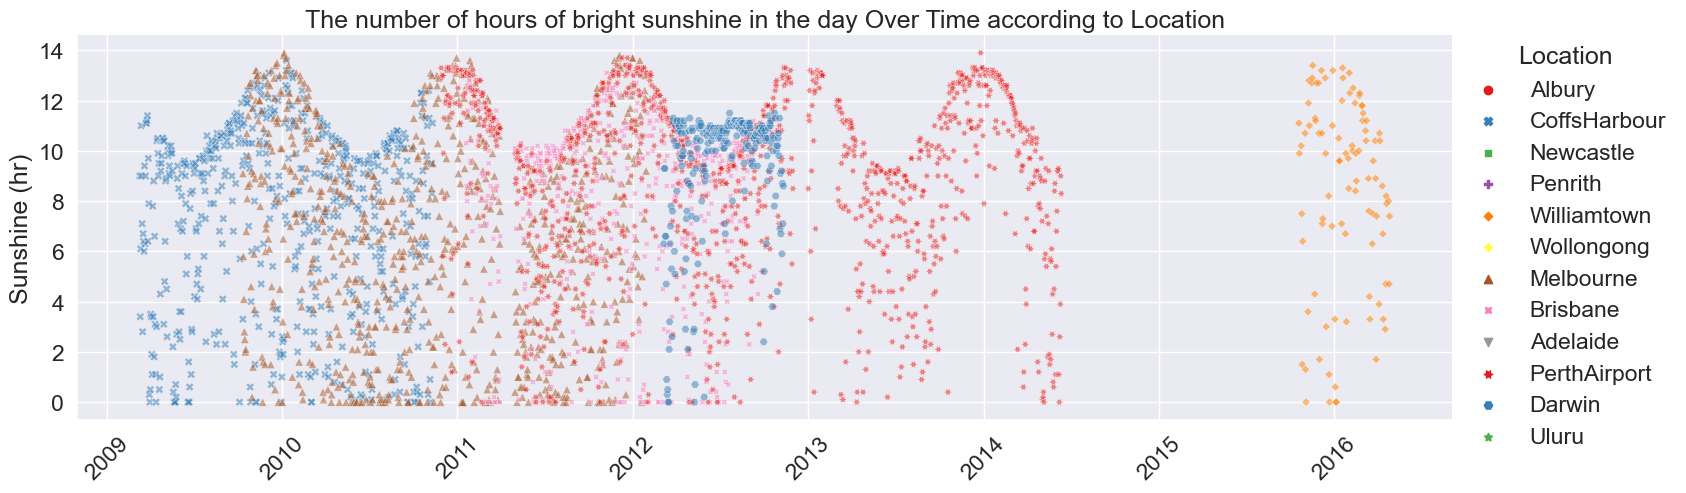

In [77]:
# Config vars
col = 'Sunshine'
category_col = 'Location'
data=df.copy()
xlabel, ylabel = '', f'{col} (hr)'
figsize = (20, 8)
title = 'The number of hours of bright sunshine in the day Over Time according to Location'

plot_scatter_over_time(col, category_col, data, title, xlabel, ylabel, figsize)

#### 1.4.2.5 The speed (km/h) of the strongest wind gust over time according to Location

<Figure size 2000x800 with 0 Axes>

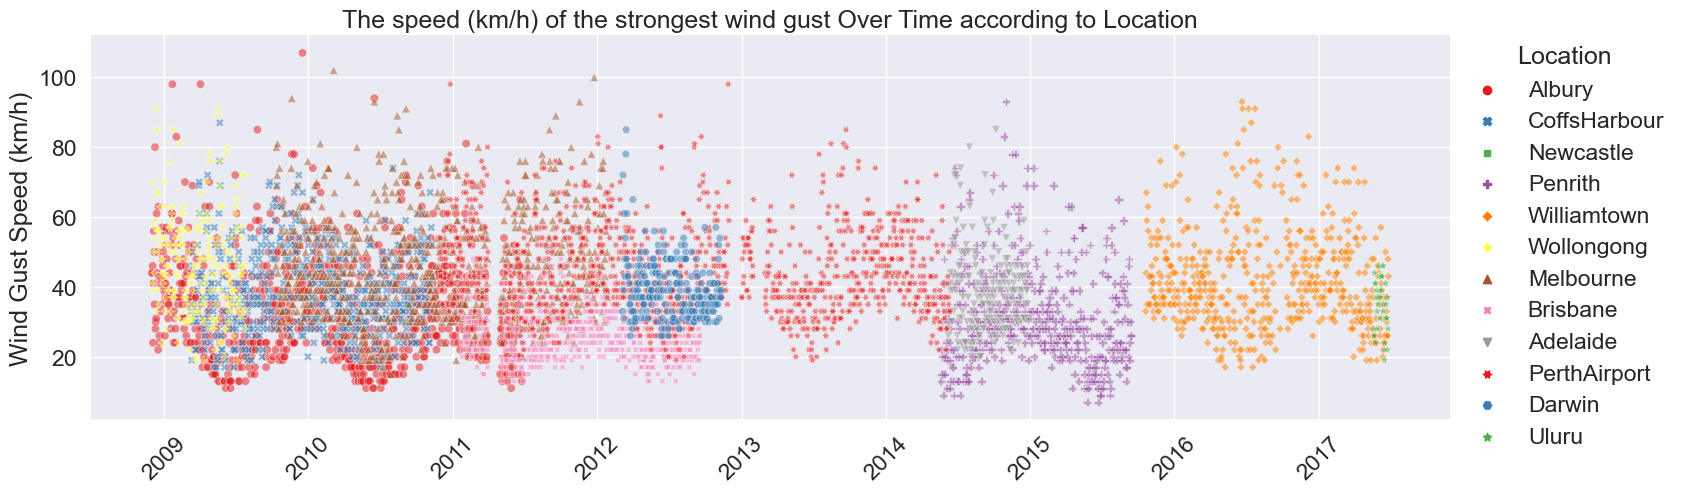

In [78]:
# Config vars
col = 'WindGustSpeed'
category_col = 'Location'
data = df
xlabel, ylabel = '', 'Wind Gust Speed (km/h)'
figsize = (20, 8)
title = 'The speed (km/h) of the strongest wind gust Over Time according to Location'

plot_scatter_over_time(col, category_col, data, title, xlabel, ylabel, figsize)

Previously we see the observations for different locations correspond to different periods of time. The wind gust speed varies from 20 km/h to 60 km/h on average, but for locations like Albury and Melbourne, there are observations that exceed 100km/h. Next, we will analyze the WindGustSpeed behavior in each location individually and its influence on the RainTomorrow target variable.

The atmospheric pressure at 9am has different tendencies when impacting on the RainTomorrow target variable varying between locations. When the atmospheric pressure is higher in Adelaide, Albury, Darwin, Melbourne, PerthAirport, and Williamtown there is a tendency for Rain Tomorrow to be No. In contrast, in Brisbane, CoffsHarbour, and Wollongong the opposite happen.

In Uluru, there are no observations for yes in the RainTomorrow variable.

For the Newcastle and Penrith there are no values for this feature.

#### 1.4.2.10 Deep Analysis Rainfall variable

In [83]:
def plot_scatter_rainfall_according_to(col, xlabel, title, palette):
    '''Draw a scatter plot comparing <col> with Rainfall variable and RainTomorrow.'''
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1)  

    # Plot scatterplot
    sns.scatterplot(x=col, y='Rainfall', hue='RainTomorrow', data=df, palette=palette)

    # visual presentation
    plt.legend(loc='upper right').set_title("Rain Tomorrow")
    plt.xlabel(xlabel)
    plt.ylabel('Rainfall')
    plt.title(f'Rainfall vs. {title} by Rain Tomorrow')
    plt.show()

##### Evaporation vs. Rainfall

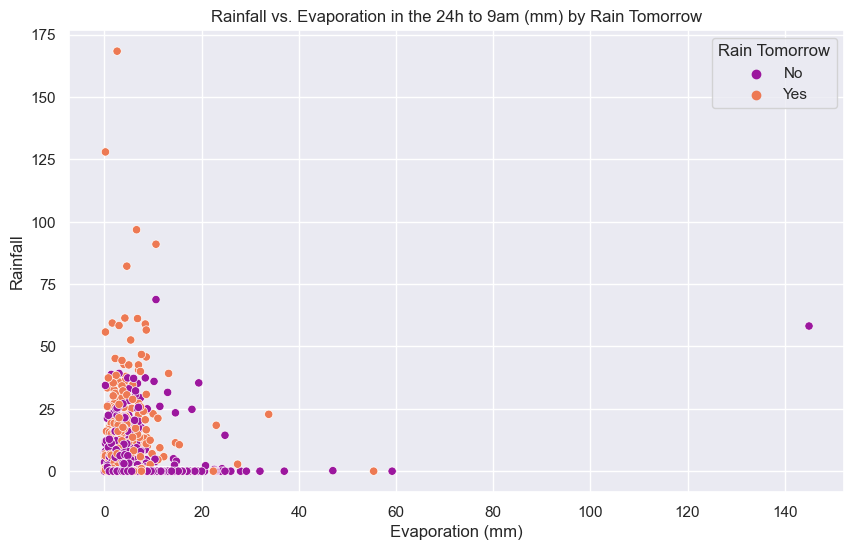

In [84]:
col = 'Evaporation'
xlabel = f'{col} (mm)'
title = f'{col} in the 24h to 9am (mm)'

# Plot a scatter plot comparing <col> with Rainfall and RainTomorrow
plot_scatter_rainfall_according_to(col, xlabel, title, 'plasma')

The lower observations of evaporations (mm) are related with the higher observations of rainfall.

##### Sunshine vs. Rainfall

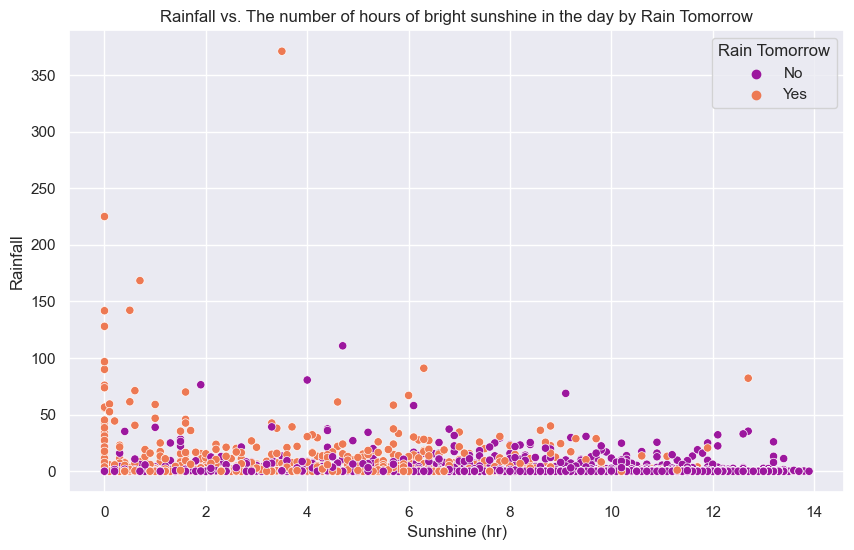

In [85]:
col = 'Sunshine'
xlabel = f'{col} (hr)'
title = f'The number of hours of bright sunshine in the day'

# Plot a scatter plot comparing <col> with Rainfall and RainTomorrow
plot_scatter_rainfall_according_to(col, xlabel, title, 'plasma')

The fewer hours of sunshine, the higher the values for the Rainfall variable and there is a tendency for it to rain the next day.

In contrast, at values greater than 6 for sunshine the Rainfall values decrease and it tends not to rain the next day.

##### Wind Gust speed vs. Rainfall

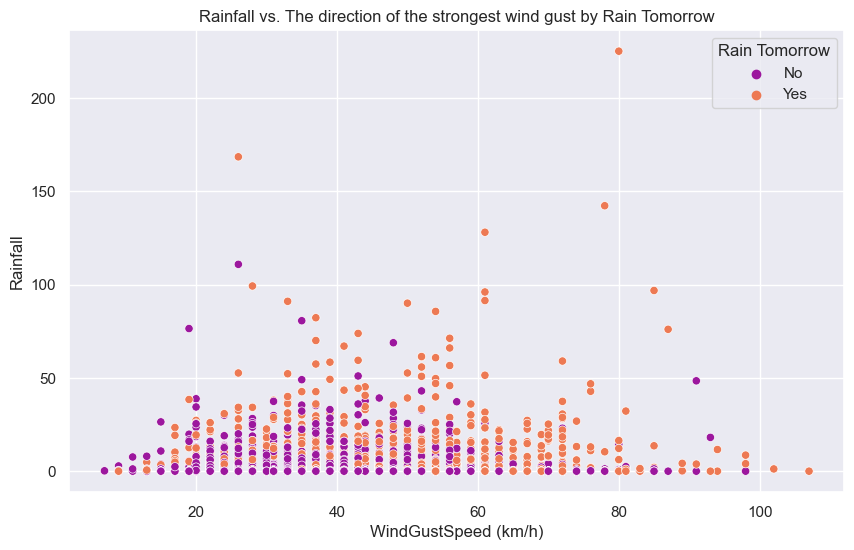

In [86]:
col = 'WindGustSpeed'
xlabel = f'{col} (km/h)'
title = f'The direction of the strongest wind gust'

# Plot a scatter plot comparing <col> with Rainfall and RainTomorrow
plot_scatter_rainfall_according_to(col, xlabel, title, 'plasma')

The higher the values for the wind gust speed, the greater the value of the rainfall variable, with the greater the tendency for it to rain tomorrow.

##### Rainfall according to Location

In [87]:
def plot_stripplot_rainfall_by(category_col, ylabel, title, palette, figsize):
    plt.figure(figsize=figsize)
    sns.set(font_scale=1.5)

    sns.stripplot(y= category_col, x='Rainfall', data=df, palette=palette, hue='RainTomorrow')

    # visual presentation
    plt.legend(loc='upper right').set_title("Rain Tomorrow")
    plt.ylabel(ylabel)
    plt.xlabel('Rainfall')
    plt.title(f'Rainfall according to {title} and Rain Tomorrow', size=18)
    plt.show()

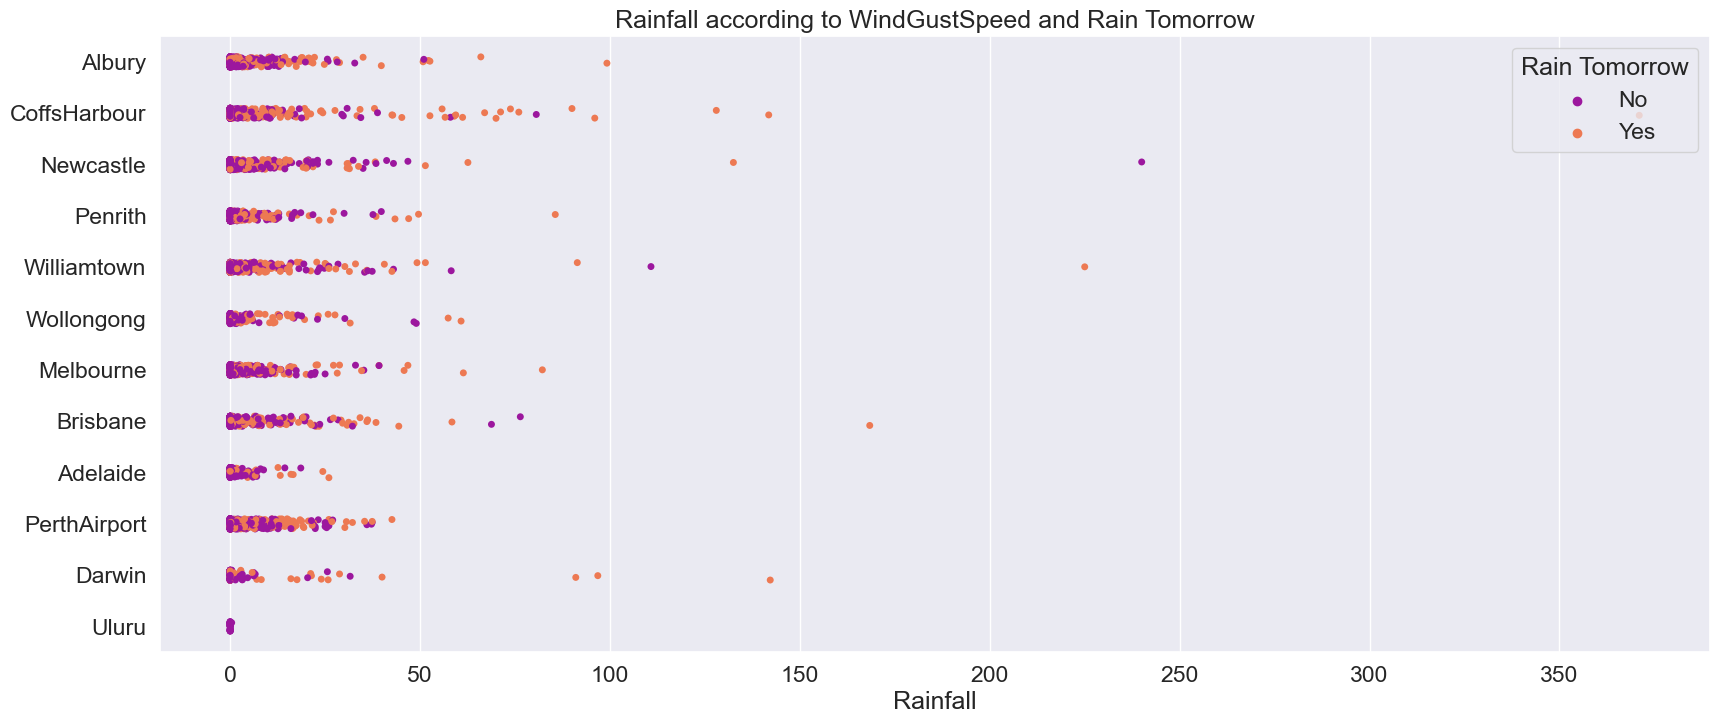

In [88]:
category_col = 'Location'
ylabel = ''
title = f'{col}'
figsize = (20,8)

# Plot a strip plot comparing <category_col> with Rainfall and RainTomorrow
plot_stripplot_rainfall_by(category_col, ylabel, title, 'plasma', figsize);

In the above plot, we can observe how the Rainfall variable behave according with each location. For example,  CoffsHarbour, Albury and Williamtown presents higher values of Rainfall with a tendency for rain the next day.

##### Rainfall according to Wind gust direction

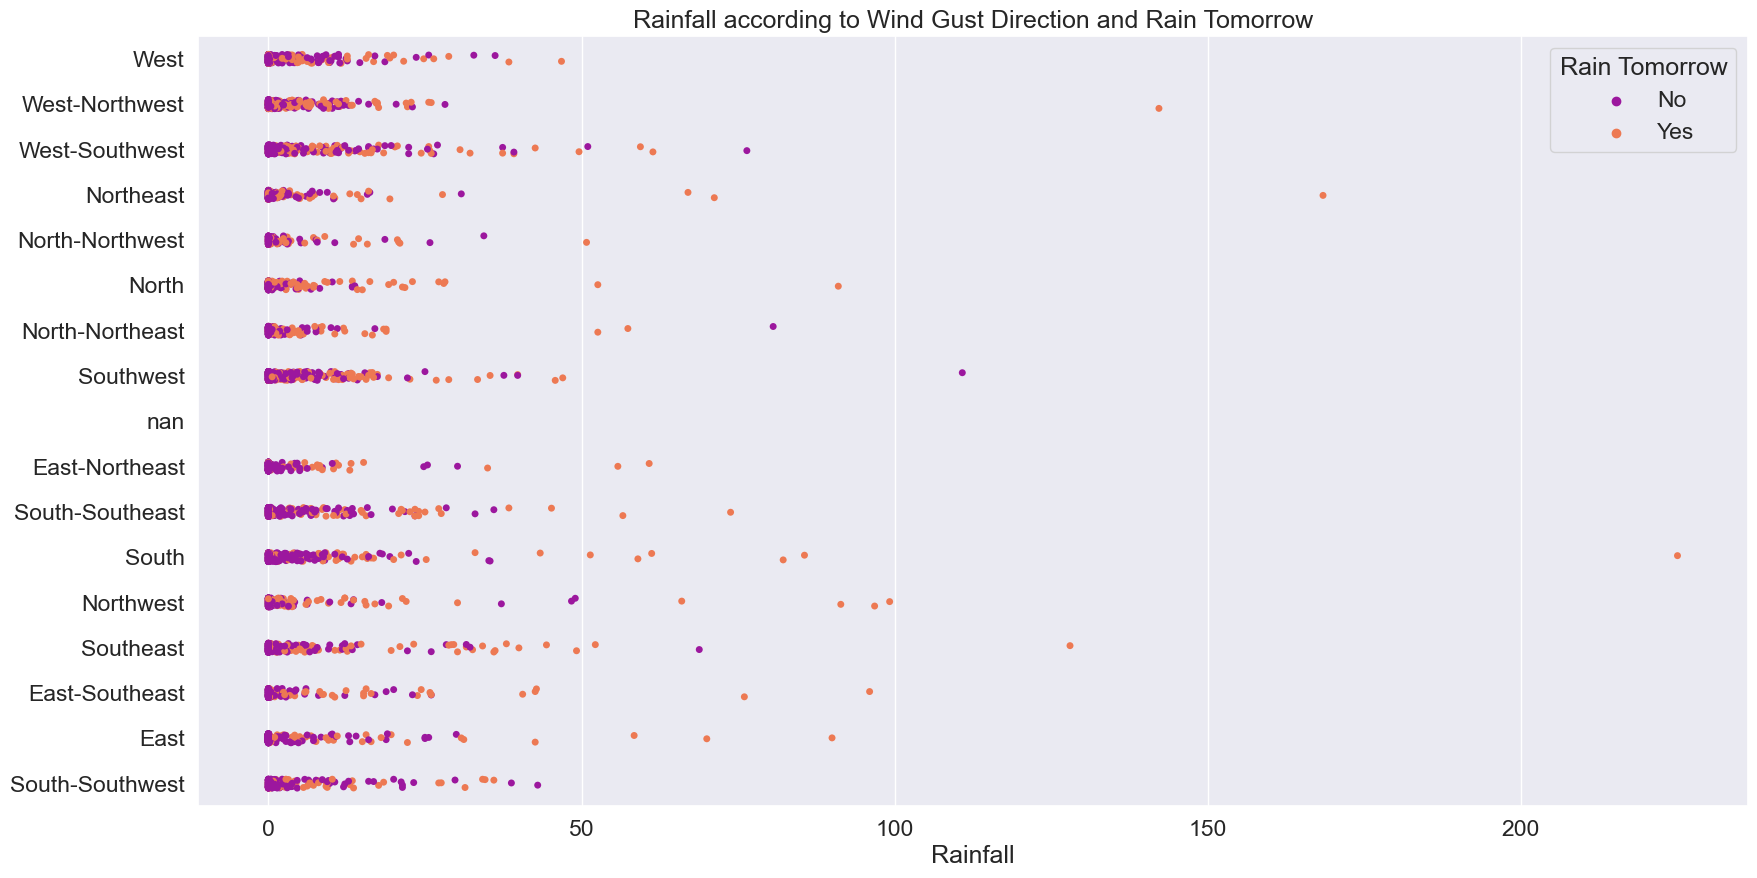

In [89]:
category_col = df['WindGustDir'].map(wind_dir_cat)
ylabel = ''
title = f'Wind Gust Direction'
figsize = (20,10)

# Plot a strip plot comparing <category_col> with Rainfall and RainTomorrow
plot_stripplot_rainfall_by(category_col, ylabel, title, 'plasma', figsize);

In the above plot, we observe how the Rainfall variable behave according with the wind gust direction registered. 
The wind direction for Northwest and South tend to present higher values por Rainfall.
There are some outliers for West-Northwest, Northeast, and South.

##### Rainfall according to Rain Today

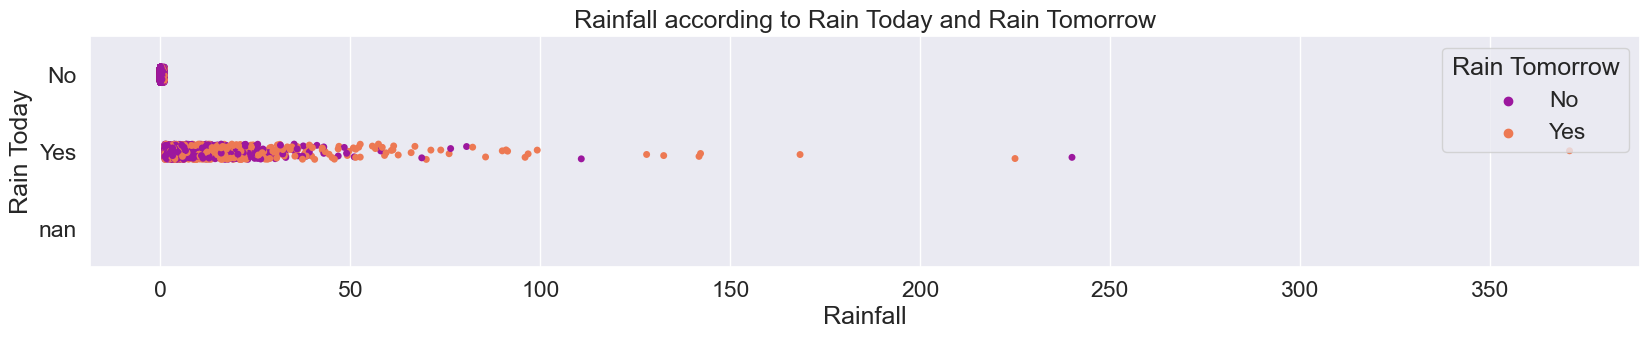

In [90]:
category_col = 'RainToday'
ylabel = 'Rain Today'
title = f'Rain Today'
figsize = (20, 3)

# Plot a strip plot comparing <category_col> with Rainfall and RainTomorrow
plot_stripplot_rainfall_by(category_col, ylabel, title, 'plasma', figsize);

Seems there is a relation between the higher values of Rainfall variable, the rain today, and the possibility of rain the next day.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Replace the Date column with year, month and day

We created the year, month, and day columns based on the Date column in the previous section 1.4.2. Now all that remains is to drop the Date column to continue with the analysis. However, we will need it in order to impute missing values for RainToday and RainTomorrow, thus we will drop the Date column later.

In [91]:
df_backup = df.copy()

In [92]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       NaN   
1         WNW           44.0        NNW  ...      1007.8       NaN       NaN   
2         WSW           46.0          W  ...      1008.7       NaN       2.0   
3          NE           24.0         SE  ...      1012.8       NaN       NaN   
4           W           41.0        ENE  ...      1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 26 columns]

#### 1.4.3.2 Encoding the RainToday and RainTomorrow variable

In [93]:
# Listing the unique values to encode 
features = categorical_col[-2:]
for col in features:
    print(f"Unique values for {col}: {df[col].unique()}")

Unique values for RainToday: ['No' 'Yes' nan]
Unique values for RainTomorrow: ['No' 'Yes' nan]


In [94]:
# Encoding the YES/NO categorical values
for col in features:
    df[col] = df[col].map({'No': 0, 'Yes': 1})
    
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       NaN   
1         WNW           44.0        NNW  ...      1007.8       NaN       NaN   
2         WSW           46.0          W  ...      1008.7       NaN       2.0   
3          NE           24.0         SE  ...      1012.8       NaN       NaN   
4           W           41.0        ENE  ...      1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8        0.0           0.0  2008     12    1  
1     17.2     24.3        0.0           0.0  2008     12    2  
2     21.0     23.2        0.0           0.0  2008     12    3  
3     18.1     26.5        0.0           0.0  2008     12    4  
4     17.8     29.7        0.0           0.0  2008     12    5  

[5 rows x 26 columns]

In [95]:
# Listing the encoded values to encode 
features = categorical_col[-2:]
for col in features:
    print(f"Encoded values for {col}: {df[col].unique()}")

Encoded values for RainToday: [ 0.  1. nan]
Encoded values for RainTomorrow: [ 0.  1. nan]


Now the RainTomorrow label is encoded having values 1 for Yes and 0 for No, same as RainToday.

#### 1.4.3.3 Correlation between Rainfall and RainTomorrow with independent variables

To calculate the correlation matrix we will not consider the Date column.

Here is the list of the correlation coefficients with the target variable Rainfall. 

There is a medium positive relation between the target variable Rainfall and RainToday, Humidity3pm, Humidity9am, Cloud9am, Cloud3pm, and WindGustSpeed columns. 

Also, there is a medium negative relation with Sunshine.

Here is the list of the correlation coefficients with the target variable RainTomorrow. 

There is a medium positive relation between the target variable RainTomorrow and the Humidity3pm, Cloud3pm, Cloud9am, RainToday, Humidity9am, Rainfall, WindGustSpeed, and MinTemp columns.

Also, there is a medium negative relation between Sunshine, Temp3pm, Pressure9am, MaxTemp, Pressure3pm, and Evaporation columns.

# 2. Preprocessing Data
## 2.1 Missing values
In Section 1.2, we found out the dataset has missing values in several columns including the target variables. Next, we will calculate again the missing values in the dataset after the processing we already did.

In [96]:
df_backup2 = df.copy()

In [97]:
def checking_missing_values(data):
    '''Check the data for missing values.
    Return:
    * missing_val: Dataframe with all columns with and without missings
    * only_missing: Dataframe with columns with missings values.
    '''
    # checking the null values
    missing_val = data.isnull().sum().to_frame("Null values")

    # Calculate the % of the null values
    missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)
    missing_val = missing_val.sort_values(by='% of missing', ascending=False)
    
    # Storing only the columns with missing values
    only_missings = missing_val[missing_val['Null values'] > 0].sort_values(by='% of missing', ascending=False)

    return [missing_val, only_missings]

In [98]:
# Checking the missing values in the df
_, missing_val = checking_missing_values(df)
    
missing_val

Null values  % of missing
Sunshine              3227         47.79
Evaporation           2912         43.12
Cloud3pm              1893         28.03
Cloud9am              1857         27.50
Pressure3pm           1302         19.28
Pressure9am           1299         19.24
WindGustDir            933         13.82
WindGustSpeed          933         13.82
WindDir9am             785         11.62
WindDir3pm             285          4.22
RainTomorrow           129          1.91
Rainfall               129          1.91
RainToday              129          1.91
WindSpeed3pm            91          1.35
Humidity3pm             87          1.29
Temp3pm                 83          1.23
MinTemp                 61          0.90
WindSpeed9am            54          0.80
MaxTemp                 48          0.71
Humidity9am             45          0.67
Temp9am                 42          0.62

### 2.1.1 Imputing missing values in categorical variables 

In [99]:
# Categorical variables with missings
display(missing_val.loc[(categorical_col[1:])])

# List the categorical with missings
categorical_cols_with_missings = missing_val.loc[(categorical_col[1:])].index.to_list()
print(f"Categorical columns with missing values: {categorical_cols_with_missings}")

Null values  % of missing
WindGustDir           933         13.82
WindDir9am            785         11.62
WindDir3pm            285          4.22
RainToday             129          1.91
RainTomorrow          129          1.91

Categorical columns with missing values: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### 2.1.1.1 Imputing missing values in RainToday and RainTomorrow

We will use the info in the dataframe to impute RainToday and RainTomorrow if it is available.

In [100]:
df_temp = df[['Date','RainToday','RainTomorrow']]

# Sort the DataFrame by the 'Date' column
df_temp = df_temp.sort_values('Date')

# Calculate the date of the next day and the previous day
df_temp['NextDay'] = df_temp['Date'] + pd.to_timedelta(1, unit='D')
df_temp['PrevDay'] = df_temp['Date'] - pd.to_timedelta(1, unit='D')

# Create a mapping dictionary to impute 'RainToday'  
mapping_dict = df_temp.set_index('NextDay')['RainTomorrow'].to_dict()

col = 'RainToday'
# Fill missing values with the impute value 
print(f"Missing values in **{col}** to impute: {df[col].isnull().sum()}")
df[col] = df[col].fillna(df.apply(lambda row: mapping_dict.get(row['Date'], row[col]), axis=1))
print(f"Missing values remaining in **{col}**: {df[col].isnull().sum()}\n")

Missing values in **RainToday** to impute: 129
Missing values remaining in **RainToday**: 75



To impute RainToday we reference the next day stored in 'NextDay' and the RainTomorrow record if is available.

In [101]:
# Create a mapping dictionary to impute 'RainTomorrow'  
mapping_dict = df_temp.set_index('PrevDay')['RainToday'].to_dict()

col = 'RainTomorrow'
# Fill missing values with the impute value 
print(f"Missing values in **{col}** to impute: {df[col].isnull().sum()}")
df[col] = df[col].fillna(df.apply(lambda row: mapping_dict.get(row['Date'], row[col]), axis=1))
print(f"Missing values remaining in **{col}**: {df[col].isnull().sum()}\n")

Missing values in **RainTomorrow** to impute: 129
Missing values remaining in **RainTomorrow**: 70



To impute RainTomorrow we reference the previous day stored in 'PrevDay' and the RainToday record if is available.

In [102]:
# Drop the Date column
df.drop('Date', axis=1, inplace=True)

We impute some missing values based on the Date column and the records for RainToday and RainTomorrow. Since the Date column is no longer needed it will be dropped, then we can continue with our analysis.

#### 2.1.1.2 Imputing missing values in WindGustDir, WindDir9am, and WindDir3pm

In [103]:
df_backup3 = df.copy()

For categorical columns, we will use the mode to impute the missing values. First, we will calculate the most frequent value by feature.

In [104]:
# listing the possible imputation values 
for col in categorical_cols_with_missings[:-2]:
    print(f"Column = {col} Mode = {df[col].mode()[0]}")

Column = WindGustDir Mode = E
Column = WindDir9am Mode = N
Column = WindDir3pm Mode = SE


To make a more accurate analysis, we will use the mode according to Location and RainTomorrow variables.

In [105]:
from scipy.stats import mode

def calculate_mode(x, col):
    ''' calculate the mode for <x>. If there is no value return the mode for the column <col>'''
    mode_result = pd.Series.mode(x)
    return mode_result.iloc[0] if not mode_result.empty else df[col].mode()[0]

impu_val = {}

# Define Columns to group the data
group_col = ['Location','RainTomorrow']

# Impute missing values of categorical columns with the mode according to Location and RainTomorrow
for col in categorical_cols_with_missings[:-2]:
    impu_val[col] = {name: calculate_mode(group[col],col) for name, group in df.groupby(group_col)}
    print(f"Impute the missing values in {col} with the mode:")
    display(impu_val[col])

    # Fill missing values with the mode 
    print(f"Missing values in {col} to impute: {df[col].isnull().sum()}")    
    df[col] = df[col].fillna(df.apply(lambda row: impu_val[col].get((row['Location'], row['RainTomorrow']), row[col]), axis=1))
    print(f"Missing values remaining in {col}: {df[col].isnull().sum()}\n")


Impute the missing values in WindGustDir with the mode:


{('Adelaide', 0.0): 'WSW',
 ('Adelaide', 1.0): 'NW',
 ('Albury', 0.0): 'W',
 ('Albury', 1.0): 'W',
 ('Brisbane', 0.0): 'E',
 ('Brisbane', 1.0): 'SE',
 ('CoffsHarbour', 0.0): 'NNE',
 ('CoffsHarbour', 1.0): 'S',
 ('Darwin', 0.0): 'ESE',
 ('Darwin', 1.0): 'N',
 ('Melbourne', 0.0): 'N',
 ('Melbourne', 1.0): 'N',
 ('Newcastle', 0.0): 'E',
 ('Newcastle', 1.0): 'E',
 ('Penrith', 0.0): 'NNE',
 ('Penrith', 1.0): 'SSE',
 ('PerthAirport', 0.0): 'E',
 ('PerthAirport', 1.0): 'NW',
 ('Uluru', 0.0): 'E',
 ('Williamtown', 0.0): 'WNW',
 ('Williamtown', 1.0): 'SSE',
 ('Wollongong', 0.0): 'NE',
 ('Wollongong', 1.0): 'SE'}

Missing values in WindGustDir to impute: 933
Missing values remaining in WindGustDir: 9

Impute the missing values in WindDir9am with the mode:


{('Adelaide', 0.0): 'N',
 ('Adelaide', 1.0): 'NE',
 ('Albury', 0.0): 'SE',
 ('Albury', 1.0): 'SE',
 ('Brisbane', 0.0): 'SW',
 ('Brisbane', 1.0): 'SW',
 ('CoffsHarbour', 0.0): 'SW',
 ('CoffsHarbour', 1.0): 'SW',
 ('Darwin', 0.0): 'SE',
 ('Darwin', 1.0): 'SE',
 ('Melbourne', 0.0): 'N',
 ('Melbourne', 1.0): 'N',
 ('Newcastle', 0.0): 'NW',
 ('Newcastle', 1.0): 'NW',
 ('Penrith', 0.0): 'SSW',
 ('Penrith', 1.0): 'SSW',
 ('PerthAirport', 0.0): 'ENE',
 ('PerthAirport', 1.0): 'N',
 ('Uluru', 0.0): 'ESE',
 ('Williamtown', 0.0): 'NW',
 ('Williamtown', 1.0): 'WNW',
 ('Wollongong', 0.0): 'NNE',
 ('Wollongong', 1.0): 'SSW'}

Missing values in WindDir9am to impute: 785
Missing values remaining in WindDir9am: 3

Impute the missing values in WindDir3pm with the mode:


{('Adelaide', 0.0): 'WSW',
 ('Adelaide', 1.0): 'WSW',
 ('Albury', 0.0): 'W',
 ('Albury', 1.0): 'NE',
 ('Brisbane', 0.0): 'ENE',
 ('Brisbane', 1.0): 'E',
 ('CoffsHarbour', 0.0): 'NE',
 ('CoffsHarbour', 1.0): 'S',
 ('Darwin', 0.0): 'NNW',
 ('Darwin', 1.0): 'WNW',
 ('Melbourne', 0.0): 'S',
 ('Melbourne', 1.0): 'N',
 ('Newcastle', 0.0): 'SE',
 ('Newcastle', 1.0): 'SE',
 ('Penrith', 0.0): 'NE',
 ('Penrith', 1.0): 'SSW',
 ('PerthAirport', 0.0): 'SW',
 ('PerthAirport', 1.0): 'WSW',
 ('Uluru', 0.0): 'E',
 ('Williamtown', 0.0): 'SE',
 ('Williamtown', 1.0): 'S',
 ('Wollongong', 0.0): 'NE',
 ('Wollongong', 1.0): 'SSE'}

Missing values in WindDir3pm to impute: 285
Missing values remaining in WindDir3pm: 4



We impute the majority of missing values in WindGustDir, WindDir9am, and WindDir3pm columns, however, there remain some missing values that we will drop later.

### 2.1.2 Dropping missing values less than 2% of missing
Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. Thus, we are going to set the threshold as 2%.

In [106]:
_, missing_val = checking_missing_values(df)
missing_val[missing_val['% of missing']<2]

Null values  % of missing
Rainfall              129          1.91
WindSpeed3pm           91          1.35
Humidity3pm            87          1.29
Temp3pm                83          1.23
RainToday              75          1.11
RainTomorrow           70          1.04
MinTemp                61          0.90
WindSpeed9am           54          0.80
MaxTemp                48          0.71
Humidity9am            45          0.67
Temp9am                42          0.62
WindGustDir             9          0.13
WindDir3pm              4          0.06
WindDir9am              3          0.04

In [107]:
cols_less_than_thr = missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing'] < 2)].index.to_list()
cols_less_than_thr

['Rainfall',
 'WindSpeed3pm',
 'Humidity3pm',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'MinTemp',
 'WindSpeed9am',
 'MaxTemp',
 'Humidity9am',
 'Temp9am',
 'WindGustDir',
 'WindDir3pm',
 'WindDir9am']

In [108]:
# Dropping the missing values with % of missing less than 2%
df_new = df.dropna(subset=cols_less_than_thr)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

324 rows with missing values were deleted.
This represent 4.8% of the data.
In the new dataset there are 6429 rows and 25 columns.


We dropped missing values with % of missing less than 2%, so we lost 4.8% of the data.

### 2.1.3 Imputing remaining missing values using MICE (Multiple Imputation by Chained Equations).

In [109]:
df_backup4 = df.copy()

In [110]:
_, missing_val = checking_missing_values(df)
missing_val

Null values  % of missing
Sunshine              2995         46.59
Evaporation           2694         41.90
Cloud9am              1708         26.57
Cloud3pm              1706         26.54
Pressure9am           1154         17.95
Pressure3pm           1153         17.93
WindGustSpeed          765         11.90

The dataset still has missing values in Sunshine, Evaporation, Cloud9am, Cloud3pm, Pressure9am, Pressure3pm, and WindGustSpeed columns. Considering the volume of missing values we will use MICE to impute the missing values, but first, we will encode Location, WindGustDir, WindDir9am, and WindDir3pm columns using LabelEncoder.

#### 2.1.3.1  Encoding categorical columns
In order to apply MICE to impute the remaining missing values we need to encode the categorical features, for this purpose, we will use LabelEncoder.

In [111]:
 # Checking the unique values of the categorical independent variables
encoding_col = categorical_col[:-2]
    
for i, col in enumerate(encoding_col):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Location:
  ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']

2.WindGustDir:
  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']

3.WindDir9am:
  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']

4.WindDir3pm:
  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']



In [112]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for col in encoding_col:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col,'\n', category_mappings[col],'\n')
    
display(df.head())
display(df.tail())

Location 
 {'Adelaide': 0, 'Albury': 1, 'Brisbane': 2, 'CoffsHarbour': 3, 'Darwin': 4, 'Melbourne': 5, 'Newcastle': 6, 'Penrith': 7, 'PerthAirport': 8, 'Uluru': 9, 'Williamtown': 10, 'Wollongong': 11} 

WindGustDir 
 {'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 11, 'SW': 12, 'W': 13, 'WNW': 14, 'WSW': 15} 

WindDir9am 
 {'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 11, 'SW': 12, 'W': 13, 'WNW': 14, 'WSW': 15} 

WindDir3pm 
 {'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 11, 'SW': 12, 'W': 13, 'WNW': 14, 'WSW': 15} 



Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          NaN       NaN           13   
1         1      7.4     25.1       0.0          NaN       NaN           14   
2         1     12.9     25.7       0.0          NaN       NaN           15   
3         1      9.2     28.0       0.0          NaN       NaN            4   
4         1     17.5     32.3       1.0          NaN       NaN           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1       8.0   
1           44.0           6          15  ...       1007.8       NaN   
2           46.0          13          15  ...       1008.7       NaN   
3           24.0           9           0  ...       1012.8       NaN   
4           41.0           1           7  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0       NaN     16.9     21.8        0.0           0.0  2008     12    1  
1       NaN     17.2     24.3        0.0           0.0  2008     12    2  
2       2.0     21.0     23.2        0.0           0.0  2008     12    3  
3       NaN     18.1     26.5        0.0           0.0  2008     12    4  
4       8.0     17.8     29.7        0.0           0.0  2008     12    5  

[5 rows x 25 columns]

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8419         9      3.5     21.8       0.0          NaN       NaN   
8420         9      2.8     23.4       0.0          NaN       NaN   
8421         9      3.6     25.3       0.0          NaN       NaN   
8422         9      5.4     26.9       0.0          NaN       NaN   
8423         9      7.8     27.0       0.0          NaN       NaN   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
8419            0           31.0           2           0  ...       1021.2   
8420            0           31.0           9           1  ...       1020.3   
8421            6           22.0           9           3  ...       1019.1   
8422            3           37.0           9          14  ...       1016.8   
8423            9           28.0          10           3  ...       1016.5   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  \
8419       NaN       NaN      9.4     20.9        0.0           0.0  2017   
8420       NaN       NaN     10.1     22.4        0.0           0.0  2017   
8421       NaN       NaN     10.9     24.5        0.0           0.0  2017   
8422       NaN       NaN     12.5     26.1        0.0           0.0  2017   
8423       3.0       2.0     15.1     26.0        0.0           0.0  2017   

      month  day  
8419      6   20  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  

[5 rows x 25 columns]

We have converted the categorical columns into numerical columns using LabelEncoder method.  

#### 2.1.3.2 Imputing remaining missing 

**IterativeImputer** uses round-robin linear regression, modeling each feature with missing values as a function of other features, in turn.

_References:_
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
* https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

In [113]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

df_mice = df.copy(deep=True) 
mice_imputer = IterativeImputer()
df_mice.iloc[:, :] = mice_imputer.fit_transform(df)
df_mice

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0            1     13.4     22.9       0.6     3.825299   7.304989   
1            1      7.4     25.1       0.0     3.662427  12.126448   
2            1     12.9     25.7       0.0     6.128664  12.021447   
3            1      9.2     28.0       0.0     4.232379  12.974276   
4            1     17.5     32.3       1.0     4.071089   6.677032   
...        ...      ...      ...       ...          ...        ...   
8419         9      3.5     21.8       0.0     5.560263   9.824076   
8420         9      2.8     23.4       0.0     6.630833  11.492928   
8421         9      3.6     25.3       0.0     6.510600  11.868961   
8422         9      5.4     26.9       0.0     7.563886  11.754813   
8423         9      7.8     27.0       0.0     8.370456  10.963033   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13           44.0          13          14  ...       1007.1   
1              14           44.0           6          15  ...       1007.8   
2              15           46.0          13          15  ...       1008.7   
3               4           24.0           9           0  ...       1012.8   
4              13           41.0           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8419            0           31.0           2           0  ...       1021.2   
8420            0           31.0           9           1  ...       1020.3   
8421            6           22.0           9           3  ...       1019.1   
8422            3           37.0           9          14  ...       1016.8   
8423            9           28.0          10           3  ...       1016.5   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  \
0     8.000000  4.779391     16.9     21.8        0.0           0.0  2008   
1     1.430118  1.675472     17.2     24.3        0.0           0.0  2008   
2     2.281499  2.000000     21.0     23.2        0.0           0.0  2008   
3     0.471754  1.003812     18.1     26.5        0.0           0.0  2008   
4     7.000000  8.000000     17.8     29.7        0.0           0.0  2008   
...        ...       ...      ...      ...        ...           ...   ...   
8419  1.784446  2.498008      9.4     20.9        0.0           0.0  2017   
8420  0.618620  1.684216     10.1     22.4        0.0           0.0  2017   
8421  0.796629  1.416133     10.9     24.5        0.0           0.0  2017   
8422  1.011455  1.697695     12.5     26.1        0.0           0.0  2017   
8423  3.000000  2.000000     15.1     26.0        0.0           0.0  2017   

      month  day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8419      6   20  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  

[6429 rows x 25 columns]

####  Last check for missing values

In [114]:
_, missing_val = checking_missing_values(df_mice)
missing_val

Empty DataFrame
Columns: [Null values, % of missing]
Index: []

No more missing values to remove.

In [115]:
# Store as df 
df = df_mice.copy()

df.shape

(6429, 25)

Now, the studied dataframe has 6429 rows and 25 columns with no missing values. 

## 2.2  Removing outliers

In [116]:
df_backup5 = df.copy()

In [117]:
features_with_outliers = ['MaxTemp', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
features_with_outliers

['MaxTemp',
 'Evaporation',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

We selected the features with outliers from the Univariate Analysis and considered only the continuous ones. The outliers in the target variable would not be removed.

In [118]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df[features_with_outliers]))
z

MaxTemp  Evaporation  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     0.197142     0.318069       0.424371      0.732573      0.678377   
1     0.159706     0.364767       0.424371      0.898743      0.469263   
2     0.257028     0.342335       0.562822      0.630616      0.887491   
3     0.630096     0.201354       0.960138      0.185042      0.889979   
4     1.327572     0.247598       0.216695      0.592871      0.260149   
...        ...          ...            ...           ...           ...   
8419  0.375566     0.179367       0.475560      0.222787      0.471751   
8420  0.116040     0.486313       0.475560      0.018872      0.680865   
8421  0.192147     0.451841       1.098588      0.018872      0.889979   
8422  0.451672     0.753831       0.060207      0.388957      0.889979   
8423  0.467893     0.985085       0.683236      0.018872      1.099093   

      Humidity9am  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0        0.208491     1.663001     1.349477  0.176964  0.151453  
1        1.350637     1.188998     1.233610  0.124879  0.264157  
2        1.697110     1.679345     1.084638  0.534859  0.081289  
3        1.292892     0.044853     0.405985  0.031374  0.629893  
4        0.843691     1.156308     1.531555  0.020710  1.161873  
...           ...          ...          ...       ...       ...  
8419     0.484455     1.115637     0.984424  1.479078  0.301072  
8420     0.946419     1.099292     0.835451  1.357548  0.051706  
8421     0.657691     0.919498     0.636822  1.218656  0.297405  
8422     0.830928     0.510875     0.256114  0.940871  0.563395  
8423     0.946419     0.249356     0.206457  0.489471  0.546771  

[6429 rows x 10 columns]

In [119]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")

df = df_new.copy()
df

236 rows with outliers were deleted.
This represent 3.67% of the data.
In the new dataset there are 6193 rows and 25 columns.


Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0            1     13.4     22.9       0.6     3.825299   7.304989   
1            1      7.4     25.1       0.0     3.662427  12.126448   
2            1     12.9     25.7       0.0     6.128664  12.021447   
3            1      9.2     28.0       0.0     4.232379  12.974276   
4            1     17.5     32.3       1.0     4.071089   6.677032   
...        ...      ...      ...       ...          ...        ...   
8419         9      3.5     21.8       0.0     5.560263   9.824076   
8420         9      2.8     23.4       0.0     6.630833  11.492928   
8421         9      3.6     25.3       0.0     6.510600  11.868961   
8422         9      5.4     26.9       0.0     7.563886  11.754813   
8423         9      7.8     27.0       0.0     8.370456  10.963033   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13           44.0          13          14  ...       1007.1   
1              14           44.0           6          15  ...       1007.8   
2              15           46.0          13          15  ...       1008.7   
3               4           24.0           9           0  ...       1012.8   
4              13           41.0           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8419            0           31.0           2           0  ...       1021.2   
8420            0           31.0           9           1  ...       1020.3   
8421            6           22.0           9           3  ...       1019.1   
8422            3           37.0           9          14  ...       1016.8   
8423            9           28.0          10           3  ...       1016.5   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  \
0     8.000000  4.779391     16.9     21.8        0.0           0.0  2008   
1     1.430118  1.675472     17.2     24.3        0.0           0.0  2008   
2     2.281499  2.000000     21.0     23.2        0.0           0.0  2008   
3     0.471754  1.003812     18.1     26.5        0.0           0.0  2008   
4     7.000000  8.000000     17.8     29.7        0.0           0.0  2008   
...        ...       ...      ...      ...        ...           ...   ...   
8419  1.784446  2.498008      9.4     20.9        0.0           0.0  2017   
8420  0.618620  1.684216     10.1     22.4        0.0           0.0  2017   
8421  0.796629  1.416133     10.9     24.5        0.0           0.0  2017   
8422  1.011455  1.697695     12.5     26.1        0.0           0.0  2017   
8423  3.000000  2.000000     15.1     26.0        0.0           0.0  2017   

      month  day  
0        12    1  
1        12    2  
2        12    3  
3        12    4  
4        12    5  
...     ...  ...  
8419      6   20  
8420      6   21  
8421      6   22  
8422      6   23  
8423      6   24  

[6193 rows x 25 columns]

Since we can not afford lossing more than 10% of the data we select only the columns continuous with outliers from thel Univariate Analysis. 

The threshold was defined as 3, thus only 3.67% of the data was lost.

Now, our datset has 6193 rows and 25 columns.

## 2.3 Skewness Correction

In [120]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
Rainfall       13.926819
RainTomorrow    1.266664
RainToday       1.225464
WindSpeed9am    0.676149
WindGustSpeed   0.579815
year            0.401450
WindSpeed3pm    0.356975
Temp3pm         0.291818
MaxTemp         0.263834
Evaporation     0.216294
Humidity3pm     0.157981
Pressure3pm     0.054316
WindGustDir     0.047644
month           0.045033
Location        0.021773
Cloud3pm        0.007605
day             0.005997
Pressure9am    -0.026390
Cloud9am       -0.061474
WindDir9am     -0.079878
Temp9am        -0.080334
MinTemp        -0.083012
WindDir3pm     -0.107103
Humidity9am    -0.237097
Sunshine       -0.365056

We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness.

In [121]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['RainToday', 'RainTomorrow', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am']

We will consider the numerical columns only. Rainfall is the target variable for the first prediction task, thus its transformation should be reversed after the prediction. Other than that, it represents a feature for the RainTomorrow prediction task.

In [122]:
# The categorical variables will not be taken into account
skew_columns.remove('RainToday')
skew_columns.remove('RainTomorrow')
skew_columns

['Rainfall', 'WindGustSpeed', 'WindSpeed9am']

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [123]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

We will select the best transformation method looking for the minimum absolute value of skewness.

In [124]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness        feature  Skewness_abs
10       Rainfall_cbrt  1.723726       Rainfall      1.723726
6   WindGustSpeed_cbrt -0.022118  WindGustSpeed      0.022118
0    WindSpeed9am_sqrt -0.473182   WindSpeed9am      0.473182

For each skewness column, we obtain the better transform method. We can observe as follows:
* cube-root transform method is better for columns WindGustSpeed and Rainfall
* square-root transform method is better for column WindSpeed9am

In [125]:
df_backup6 = df.copy()

In [126]:
# Cube-root method Transform  
df['WindGustSpeed'] = np.cbrt(df['WindGustSpeed'])
df['Rainfall'] = np.cbrt(df['Rainfall'])

# Square-root method Transform the WindGustSpeed column
df['WindSpeed9am'] = np.sqrt(df['WindSpeed9am'])

In [127]:
# This is the new skewness for the transformed columns
skew_columns
df[skew_columns].skew()

Rainfall         1.723726
WindGustSpeed   -0.022118
WindSpeed9am    -0.473182
dtype: float64

After updating the df dataset with the corresponding transform method, we can continue with the analysis.

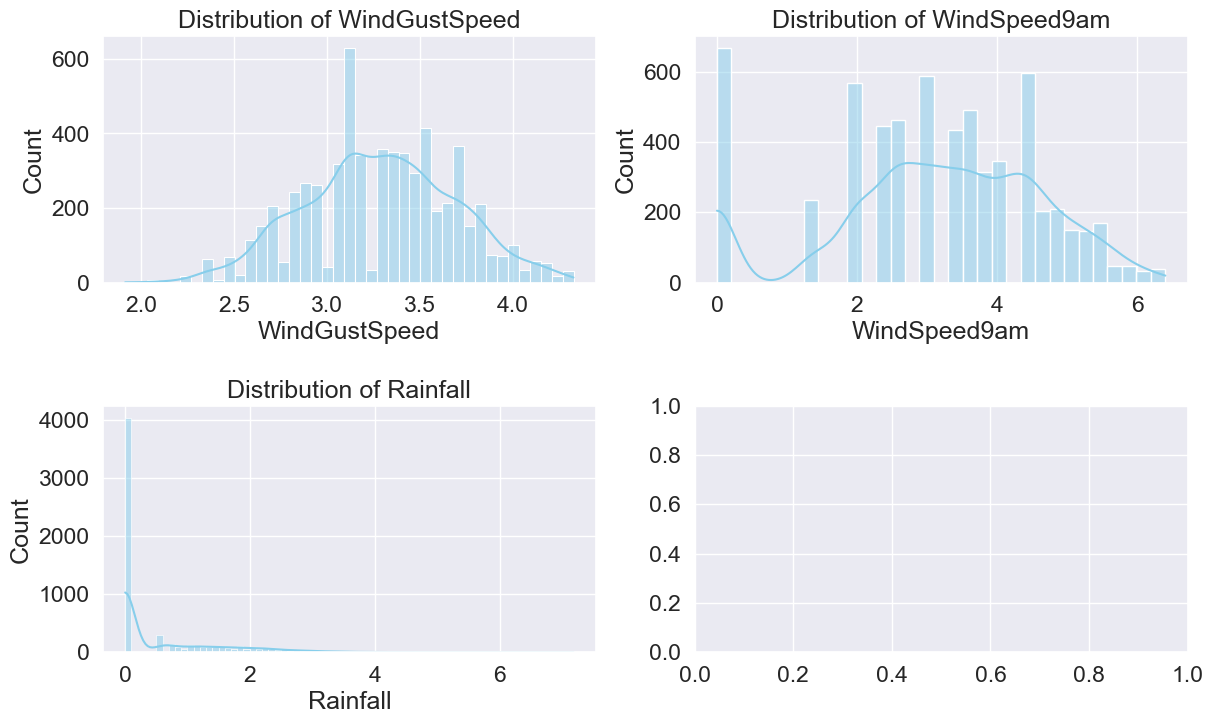

In [128]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, ['WindGustSpeed', 'WindSpeed9am', 'Rainfall']):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.4 Feature Scaling using Standard Scalarization

### 2.4.1 Separating features and label
#### 2.4.1.1 Separating features for regression model to predict Rainfall

In [129]:
# Separating the independent and target variables into x and y 
x = df.drop(['Rainfall'], axis=1)
y = df['Rainfall']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (6193, 24)
Label Dimension = (6193,)


Location  MinTemp  MaxTemp  Evaporation   Sunshine  WindGustDir  \
0         1     13.4     22.9     3.825299   7.304989           13   
1         1      7.4     25.1     3.662427  12.126448           14   
2         1     12.9     25.7     6.128664  12.021447           15   
3         1      9.2     28.0     4.232379  12.974276            4   
4         1     17.5     32.3     4.071089   6.677032           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0       3.530348          13          14      4.472136  ...       1007.1   
1       3.530348           6          15      2.000000  ...       1007.8   
2       3.583048          13          15      4.358899  ...       1008.7   
3       2.884499           9           0      3.316625  ...       1012.8   
4       3.448217           1           7      2.645751  ...       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  \
0  8.000000  4.779391     16.9     21.8        0.0           0.0  2008     12   
1  1.430118  1.675472     17.2     24.3        0.0           0.0  2008     12   
2  2.281499  2.000000     21.0     23.2        0.0           0.0  2008     12   
3  0.471754  1.003812     18.1     26.5        0.0           0.0  2008     12   
4  7.000000  8.000000     17.8     29.7        0.0           0.0  2008     12   

   day  
0    1  
1    2  
2    3  
3    4  
4    5  

[5 rows x 24 columns]

0    0.843433
1    0.000000
2    0.000000
3    0.000000
4    1.000000
Name: Rainfall, dtype: float64

#### 2.4.1.2 Separating features for classification model to predict RainTomorrow

In [130]:
# Separating the independent and target variables into x and y 
x2 = df.drop(['RainTomorrow'], axis=1)
y2 = df['RainTomorrow']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (6193, 24)
Label Dimension = (6193,)


Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustDir  \
0         1     13.4     22.9  0.843433     3.825299   7.304989           13   
1         1      7.4     25.1  0.000000     3.662427  12.126448           14   
2         1     12.9     25.7  0.000000     6.128664  12.021447           15   
3         1      9.2     28.0  0.000000     4.232379  12.974276            4   
4         1     17.5     32.3  1.000000     4.071089   6.677032           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0       3.530348          13          14  ...       1007.7       1007.1   
1       3.530348           6          15  ...       1010.6       1007.8   
2       3.583048          13          15  ...       1007.6       1008.7   
3       2.884499           9           0  ...       1017.6       1012.8   
4       3.448217           1           7  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  year  month  day  
0  8.000000  4.779391     16.9     21.8        0.0  2008     12    1  
1  1.430118  1.675472     17.2     24.3        0.0  2008     12    2  
2  2.281499  2.000000     21.0     23.2        0.0  2008     12    3  
3  0.471754  1.003812     18.1     26.5        0.0  2008     12    4  
4  7.000000  8.000000     17.8     29.7        0.0  2008     12    5  

[5 rows x 24 columns]

array([0., 1.])

### 2.4.2 Scaling Data
#### 2.4.2.1 Scaling the data for regression model to predict Rainfall

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model 1 to predict Rainfall {'*'*30}")
display(x.head())



****************************** x features for regression model 1 to predict Rainfall ******************************


Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0 -1.368377  0.064412 -0.188773    -0.306779 -0.079500     1.189559   
1 -1.368377 -1.010603  0.175465    -0.361826  1.263804     1.382760   
2 -1.368377 -0.025173  0.274802     0.471699  1.234550     1.575960   
3 -1.368377 -0.688099  0.655596    -0.169197  1.500017    -0.549248   
4 -1.368377  0.799006  1.367514    -0.223708 -0.254455     1.189559   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0       0.608001    1.217964    1.360598      0.859846  ...    -1.436383   
1       0.608001   -0.369957    1.580838     -0.745270  ...    -1.314796   
2       0.737739    1.217964    1.580838      0.786323  ...    -1.158471   
3      -0.981987    0.310581   -1.722769      0.109592  ...    -0.446324   
4       0.405806   -1.504186   -0.181086     -0.325995  ...    -1.627447   

   Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow      year  \
0  1.420641  0.243087 -0.167406 -0.144331  -0.560131     -0.550424 -1.748804   
1 -1.032807 -0.989508 -0.114812  0.279644  -0.560131     -0.550424 -1.748804   
2 -0.714868 -0.860635  0.551374  0.093095  -0.560131     -0.550424 -1.748804   
3 -1.390697 -1.256230  0.042969  0.652742  -0.560131     -0.550424 -1.748804   
4  1.047202  1.522020 -0.009625  1.195429  -0.560131     -0.550424 -1.748804   

      month       day  
0  1.675368 -1.672543  
1  1.675368 -1.558982  
2  1.675368 -1.445420  
3  1.675368 -1.331859  
4  1.675368 -1.218297  

[5 rows x 24 columns]

#### 2.4.2.2 Scaling the data for classification model to predict RainTomorrow

In [132]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for regression model 2 to predict RainTomorrow {'*'*30}")
display(x2.head())



****************************** x2 features for regression model 2 to predict RainTomorrow ******************************


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 -1.368377  0.064412 -0.188773  0.333073    -0.306779 -0.079500     1.189559   
1 -1.368377 -1.010603  0.175465 -0.607940    -0.361826  1.263804     1.382760   
2 -1.368377 -0.025173  0.274802 -0.607940     0.471699  1.234550     1.575960   
3 -1.368377 -0.688099  0.655596 -0.607940    -0.169197  1.500017    -0.549248   
4 -1.368377  0.799006  1.367514  0.507755    -0.223708 -0.254455     1.189559   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0       0.608001    1.217964    1.360598  ...    -1.763861    -1.436383   
1       0.608001   -0.369957    1.580838  ...    -1.267013    -1.314796   
2       0.737739    1.217964    1.580838  ...    -1.780994    -1.158471   
3      -0.981987    0.310581   -1.722769  ...    -0.067724    -0.446324   
4       0.405806   -1.504186   -0.181086  ...    -1.232747    -1.627447   

   Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday      year     month  \
0  1.420641  0.243087 -0.167406 -0.144331  -0.560131 -1.748804  1.675368   
1 -1.032807 -0.989508 -0.114812  0.279644  -0.560131 -1.748804  1.675368   
2 -0.714868 -0.860635  0.551374  0.093095  -0.560131 -1.748804  1.675368   
3 -1.390697 -1.256230  0.042969  0.652742  -0.560131 -1.748804  1.675368   
4  1.047202  1.522020 -0.009625  1.195429  -0.560131 -1.748804  1.675368   

        day  
0 -1.672543  
1 -1.558982  
2 -1.445420  
3 -1.331859  
4 -1.218297  

[5 rows x 24 columns]

## 2.5 Muticollinearity Analysis and Feature Selection


### 2.5.1 Checking Variance Inflation Factor (VIF)

#### 2.5.1.1 Checking VIF for regression model 1 to predict Rainfall

In [133]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
18        Temp3pm   46.300751
2         MaxTemp   38.318598
13    Pressure9am   24.516306
14    Pressure3pm   23.232311
17        Temp9am   19.079698
1         MinTemp   11.052130
4        Sunshine    7.409119
12    Humidity3pm    6.754738
11    Humidity9am    4.780446
3     Evaporation    4.165486
6   WindGustSpeed    3.688856
15       Cloud9am    3.143380
16       Cloud3pm    3.052976
10   WindSpeed3pm    2.634668
9    WindSpeed9am    2.140294
21           year    1.792411
0        Location    1.717335
20   RainTomorrow    1.662706
5     WindGustDir    1.555051
19      RainToday    1.488837
8      WindDir3pm    1.448849
7      WindDir9am    1.392023
22          month    1.242220
23            day    1.007367

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features:  
* Temp3pm	(46.300751)
* MaxTemp	(38.318598)
* Pressure9am	(24.516306)
* Pressure3pm	(23.232311)
* Temp9am	(19.079698)
* MinTemp	(11.052130)

have VIF value greater than 10 which means they have high correlation with each other. 

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.
Then, we will analyze the correlation with the target variable and the context of our project.

<!-- # Saving a backup of x
x_backup = x.copy() -->

In [134]:
# Dropping the columns with multicollinearity
x = x.drop(['Temp3pm', 'Pressure3pm', 'MaxTemp', 'Temp9am'], axis=1) 

Considering that we have 4 measurements of temperature and two of atmospheric pressure with multicollinearity issues, we will only keep one of temperature and one of atmospheric pressure. The selected features will more correlated with the target variable.

We drop the Temp3pm, MaxTemp, Temp9am, and Pressure3pm columns to solve the multicollinearity problem since are less correlated with the target variable Rainfall.

In [135]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
3        Sunshine    6.140068
2     Evaporation    3.948666
5   WindGustSpeed    3.568008
11    Humidity3pm    3.081072
13       Cloud9am    3.070342
1         MinTemp    3.013092
10    Humidity9am    3.004725
14       Cloud3pm    2.875142
9    WindSpeed3pm    2.533974
8    WindSpeed9am    2.084812
17           year    1.766061
0        Location    1.711326
16   RainTomorrow    1.612079
12    Pressure9am    1.558166
4     WindGustDir    1.536511
15      RainToday    1.411470
7      WindDir3pm    1.356157
6      WindDir9am    1.276379
18          month    1.169860
19            day    1.003216

Dropping the Temp3pm, MaxTemp, Temp9am, and Pressure3pm columns solved the multicollinearity issue. We can now move ahead with model building. 

#### 2.5.1.1 Checking VIF for classification model to predict RainTomorrow

In [136]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
19        Temp3pm   46.380289
2         MaxTemp   38.271728
14    Pressure9am   24.532088
15    Pressure3pm   23.200819
18        Temp9am   19.085636
1         MinTemp   11.000162
5        Sunshine    7.082997
13    Humidity3pm    6.504033
3        Rainfall    4.948406
12    Humidity9am    4.838048
20      RainToday    4.645013
4     Evaporation    4.173727
7   WindGustSpeed    3.506132
16       Cloud9am    3.122501
17       Cloud3pm    3.054323
11   WindSpeed3pm    2.623151
10   WindSpeed9am    2.136635
21           year    1.787427
0        Location    1.708786
6     WindGustDir    1.555012
9      WindDir3pm    1.449054
8      WindDir9am    1.392981
22          month    1.240740
23            day    1.006994

In [137]:
# Dropping the columns with multicollinearity
x2 = x2.drop(['Pressure9am', 'Temp9am', 'MinTemp', 'MaxTemp'] , axis=1) 

Same as the previous section, 4 measurements of temperature, and 2 for atmospheric pressure have multicollinearity issues, we will select the more correlated features with the target variable RainTomorrow and keep only one temperature and one atmospheric pressure for the analysis.

We drop the MinTemp, MaxTemp, Temp9am, and Pressure9pm columns to solve the multicollinearity problem since are less correlated with the target variable Rainfall.

In [138]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
3        Sunshine    6.561823
1        Rainfall    4.920324
16      RainToday    4.596829
15        Temp3pm    3.974588
2     Evaporation    3.709662
5   WindGustSpeed    3.401135
10    Humidity9am    3.158820
13       Cloud9am    2.968792
11    Humidity3pm    2.920214
14       Cloud3pm    2.909695
9    WindSpeed3pm    2.516488
8    WindSpeed9am    2.061522
17           year    1.743929
0        Location    1.682286
4     WindGustDir    1.525156
12    Pressure3pm    1.473622
6      WindDir9am    1.355727
7      WindDir3pm    1.339716
18          month    1.166007
19            day    1.002916

Dropping the MinTemp, MaxTemp, Temp9am, and Pressure9pm columns solved the multicollinearity issue. We can now move ahead with model building. 

## 2.6 Balancing the Dataset for Classification model
As we see previously in the Section 1.4.1.2. The dataset was imbalance: 5052 (74.8%) records for "No" and only 1572 (23.3%) records as "Yes". So, we are going to apply SMOTE for oversampling the data.

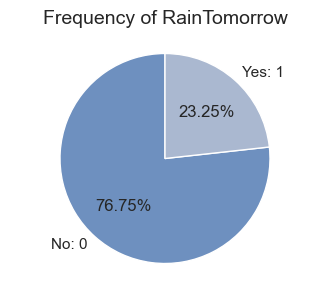

In [139]:
# Count the frequencies of target
target_counts = y2.value_counts()

# Create a pie plot
sns.set(font_scale=1)
sns.set_palette('vlag')
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['No: 0', 'Yes: 1'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of RainTomorrow", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

After processing the data, the dataset is still imbalanced: 76.75% for No and 23.25% for No.

In [140]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(x2, y2)

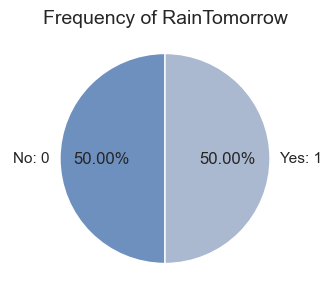

In [141]:
# Count the frequencies of target
target_counts = Y.value_counts()

# Create a pie plot
# sns.set(font_scale=1)
# sns.set_palette('vlag')
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['No: 0', 'Yes: 1'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of RainTomorrow", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Since the data is balanced, we can build machine learning classification models.

# 3. Modeling for predicting Rainfall

In [142]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 3.1 Finding the best random state

In [143]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [144]:
%%time
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8185 at random_state 143
CPU times: total: 641 ms
Wall time: 1.85 s


Linear Regression model achieved 81.85% as the R2 score.

Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 3.2 Creating train test split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (4335, 20)
x_test shape:   (1858, 20)
y_train shape:  (4335,)
y_test shape:   (1858,)


## 3.3 Regression Algoritms

In [146]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [147]:
eval_model

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean]
Index: []

### 3.3.1 Linear Regression

In [148]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


LR coef_        : [-0.00812763  0.02695448  0.02054434 -0.05358574 -0.01556949  0.04142346
  0.02844847  0.02302899  0.01683719 -0.00893561  0.09543913  0.01424456
 -0.00109631  0.00322754 -0.02199003  0.7124688   0.02656527  0.00548076
  0.0085625  -0.00396589]

LR intercept_ : 0.5472605554687381
LR score train  : 0.7878943913748391
LR score test   : 0.8184732299085715
********** E R R O R **********
Mean squared error: 0.1482
Root Mean squared error: 0.3849
Cross-validation results (R2): [0.80627323 0.75634217 0.77598696 0.7718738  0.7679771  0.7867136
 0.78113133 0.84422752 0.84516743 0.80817192]
Average R2: 0.7944
R2_Score(test): 0.8185


### 3.3.2 Random Forest Regressor

In [149]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: total: 2.14 s
Wall time: 48.3 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=143)

In [150]:
random_search.best_estimator_

RandomForestRegressor(max_depth=70, min_samples_leaf=8, min_samples_split=5,
                      n_estimators=80)

In [151]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }


Best parameters : {'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 70, 'bootstrap': True}
Best score : 0.802125143341869
Best Estimator:  RandomForestRegressor(max_depth=70, min_samples_leaf=8, min_samples_split=5,
                      n_estimators=80)
********** E R R O R **********
Mean squared error: 0.1389
Root Mean squared error: 0.3727
Cross-validation results (R2): 0.802125143341869
Average R2: 0.8021
R2_Score(test): 0.8298


### 3.3.3 Decision Tree Regressor

In [152]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


********** E R R O R **********
Mean squared error: 0.2725
Root Mean squared error: 0.5220
Cross-validation results (R2): [0.58907056 0.63669346 0.47398683 0.60902197 0.62399668]
Average R2: 0.5866
R2_Score(test): 0.6662


### 3.3.4 K Neighbors Regressor

In [153]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


********** E R R O R **********
Mean squared error: 0.1850
Root Mean squared error: 0.4301
Cross-validation results (R2): [0.7618693  0.71307383 0.72823203 0.76021842 0.78806494]
Average R2: 0.7503
R2_Score(test): 0.7733


### 3.3.5 Gradient Boosting Regressor

In [154]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")



********** E R R O R **********
Mean squared error: 0.1412
Root Mean squared error: 0.3757
Cross-validation results (R2): [0.7125541  0.77343027 0.78984793 0.8121762  0.83273235]
Average R2: 0.7841
R2_Score(test): 0.8270
CPU times: total: 5.33 s
Wall time: 12 s


### 3.3.6 Lasso

In [155]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


********** E R R O R **********
Mean squared error: 0.8163
Root Mean squared error: 0.9035
Cross-validation results (R2): [-1.06061958e-04 -1.52830467e-02 -3.94425225e-03 -1.96121659e-05
 -4.92810073e-02]
Average R2: -0.0137
R2_Score(test): -0.0001
CPU times: total: 31.2 ms
Wall time: 69 ms


### 3.3.7 Ridge

In [156]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


********** E R R O R **********
Mean squared error: 0.1482
Root Mean squared error: 0.3849
Cross-validation results (R2): [0.77759673 0.77114314 0.77843981 0.80729145 0.8268443 ]
Average R2: 0.7923
R2_Score(test): 0.8185
CPU times: total: 31.2 ms
Wall time: 64.9 ms


### 3.3.8 Support Vector Regressor

In [157]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


********** E R R O R **********
Mean squared error: 0.1556
Root Mean squared error: 0.3945
Cross-validation results (R2): [0.7609625  0.71838115 0.73617752 0.80595139 0.82433677]
Average R2: 0.7692
R2_Score(test): 0.8094
CPU times: total: 6.59 s
Wall time: 12.9 s


In [158]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean, Dif_R2_CVmean]
Index: []

From the summary of the models results and comparing the cross-validation scores (CV_Mean) and R2 score (test), we conclude Random Forest Regressor is our best-performing model since the two metrics are very close (Difference: 0.027126), this indicates that the model is performing consistently on both the test set and across different folds in cross-validation.

This consistency is a positive sign, suggesting that the model generalizes well to new data.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 3.4 Hyper Parameter Tuning
### 3.4.1 Finding the best parameters for Random Forest Regressor

In [159]:
random_state

143

In [160]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

CPU times: total: 1.67 s
Wall time: 1min 1s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=143, scoring='neg_mean_squared_error')

In [161]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 9,
 'max_depth': 50,
 'bootstrap': True}

These are the best parameters for training the model.

In [162]:
best_model

RandomForestRegressor(max_depth=50, min_samples_leaf=9, min_samples_split=5,
                      n_estimators=70)

## 3.5 Final Regression Model to predict Rainfall

In [163]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=50, min_samples_leaf=9, min_samples_split=5, n_estimators=70)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 82.88%


# 4. Modeling for predicting RainTomorrow

## 4.1 Finding the best random state

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [165]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9225 at random_state 154
CPU times: total: 4min 5s
Wall time: 9min 5s


In [166]:


def find_best_random_state(model, X, Y, test_size=0.3, n_iter=200):
    best_acc = 0
    best_random_state = 0

    for i in range(1, n_iter + 1):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return best_random_state, best_acc

# Set parameters
model = RandomForestClassifier()
test_size = 0.3
n_iter = 200

# Find best random state
%%time
random_state, acc = find_best_random_state(model, X, Y, test_size=test_size, n_iter=n_iter)

print(f"Best accuracy is {round(acc, 4)} at random_state {random_state}")


UsageError: Line magic function `%%time` not found.


In [193]:
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, X, Y, test_size=0.3, n_iter=200):
    best_acc = 0
    best_random_state = 0

    for i in range(1, n_iter + 1):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return best_random_state, best_acc

# Measure execution time
start_time = time.time()

# Define the RandomForestClassifier model
model = RandomForestClassifier()

# Find the best random state
random_state, best_acc = find_best_random_state(model, X, Y)

end_time = time.time()
print(f"Best accuracy is {round(best_acc, 4)} at random_state {random_state}")
print(f"Time taken to find best random state: {end_time - start_time:.2f} seconds")


Best accuracy is 0.9236 at random_state 55
Time taken to find best random state: 552.68 seconds


Best accuracy is 92.25% at random_state 55

## 4.2 Creating train test split

In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (6654, 20)
x_test shape:   (2852, 20)
y_train shape:  (6654,)
y_test shape:   (2852,)


## 4.3 Classification Algorithms¶

In [195]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [196]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [197]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}

### 4.3.1 RandomForestClassifier 

In [198]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[1349  128]
 [  98 1277]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1477
         1.0       0.91      0.93      0.92      1375

    accuracy                           0.92      2852
   macro avg       0.92      0.92      0.92      2852
weighted avg       0.92      0.92      0.92      2852

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 92.08%
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 9, in <module>
  File "C:\Users\rachn\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6296, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'append'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

### 4.3.2 Extra Trees Classifier

In [199]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[1341  136]
 [  70 1305]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1477
         1.0       0.91      0.95      0.93      1375

    accuracy                           0.93      2852
   macro avg       0.93      0.93      0.93      2852
weighted avg       0.93      0.93      0.93      2852

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 92.78%
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 9, in <module>
  File "C:\Users\rachn\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6296, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'append'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

### 4.3.3 Logistic Regression

In [200]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[1220  257]
 [ 248 1127]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1477
         1.0       0.81      0.82      0.82      1375

    accuracy                           0.82      2852
   macro avg       0.82      0.82      0.82      2852
weighted avg       0.82      0.82      0.82      2852

Training Accuracy using LogisticRegression is 81.29%
The accuracy score using LogisticRegression is 82.29%
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 9, in <module>
  File "C:\Users\rachn\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6296, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'append'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

### 4.3.4 Support Vector Machine Classifier

In [201]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[1274  203]
 [ 121 1254]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.86      0.89      1477
         1.0       0.86      0.91      0.89      1375

    accuracy                           0.89      2852
   macro avg       0.89      0.89      0.89      2852
weighted avg       0.89      0.89      0.89      2852

Training Accuracy using SVC is 89.27%
The accuracy score using SVC is 88.64%
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 9, in <module>
  File "C:\Users\rachn\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6296, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'append'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

### 4.3.5 Gradient Boosting Classifier

In [202]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[1327  150]
 [ 159 1216]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1477
         1.0       0.89      0.88      0.89      1375

    accuracy                           0.89      2852
   macro avg       0.89      0.89      0.89      2852
weighted avg       0.89      0.89      0.89      2852

Training Accuracy using GradientBoostingClassifier is 89.69%
The accuracy score using GradientBoostingClassifier is 89.17%
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 9, in <module>
  File "C:\Users\rachn\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6296, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'append'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rachn\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

## 4.5 Hyper Parameter Tuning
### 4.5.1 Finding the best parameters for ExtraTreesClassifier

In [208]:
random_state

55

In [209]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

These are the best parameters for training the model.

In [212]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'entropy',
                                   bootstrap = True,
                                   max_depth = 100,
                                   max_features = 'sqrt',
                                   min_samples_split = 2,
                                   min_samples_leaf = 1,
                                   n_estimators = 220,
                                   n_jobs = 1, 
                                   random_state = 500)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 91.73%


Above, the prediction model with the parameters we obtained as best parameters after the hyper-tunning process.

In [213]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'entropy',
                                   bootstrap = False,
                                   max_depth = 100,
                                   max_features = 'sqrt',
                                   min_samples_split = 2,
                                   min_samples_leaf = 1,
                                   n_estimators = 160,
                                   n_jobs = 1, 
                                   random_state = 55)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 92.88%


Adjusting the following parameters we improve the accuracy_score to 93.16% for the prediction model for RainTomorrow, as follows:
- bootstrap: False
- n_stimators: 160
- random_state = 55

In [214]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

Here we can see area under curve for each model used. The blue one is the best model ExtraTreesClassifier.

**Final Conclusions:**

- The given dataset consists of 8425 rows and 23 columns. We did EDA analysis on all features.   

- We have two target variables Rainfall, which is continuous therefore we built a regression model, and RainTomorrow, which is categorical Yes/No, so we built a classification model.

- The final regression model is RandomForestRegressor with an R2 score of 83.12% for predicting Rainfall. 

- The final classification model is ExtraTreesClassifier with a 93.16% accuracy score for predicting RainTomorrow.

- The duplicates represented 19.7% of the initial data, after dropping duplicates the new dataset remains with 6753 rows and 23 columns.

- Dropping the missing values represented we lose 324 + 9 rows (4.8% of the data).

- Handling the outliers represented the elimination of 3.67% of the total records (236 rows). We set the threshold as 3.

- In order to avoid multicollinearity issues we drop 3 columns for both the regression model data set and the classification model.

